In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from matplotlib import style
style.use('ggplot')
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as SM
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

In [7]:
# Reading the Dictonary
df_dict = pd.read_excel('Data-Dictionary (1).xlsx')
df_dict

,Variable Name,Description
0,Networth Next Year,Net worth of the customer in next year
1,Total assets,Total assets of customer
2,Net worth,Net worth of the customer of present year
3,Total income,Total income of the customer
4,Change in stock,difference between value of current stock and...
5,Total expenses,Total expense done by customer
6,Profit after tax,Profit after tax deduction
7,PBDITA,"Profit before depreciation, income tax and am..."
8,PBT,Profit before tax deduction
9,Cash profit,Total Cash profit


In [8]:
# Reading the Dataset
df = pd.read_csv('Company(FRA) (2).csv')
df.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


### Exploratory Data Analysis

#### Fixing messy column names (containing spaces) for ease of use

In [9]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

In [10]:
# Information of Datase
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Total_assets                                    4256 non-null   float64
 3   Net_worth                                       4256 non-null   float64
 4   Total_income                                    4025 non-null   float64
 5   Change_in_stock                                 3706 non-null   float64
 6   Total_expenses                                  4091 non-null   float64
 7   Profit_after_tax                                4102 non-null   float64
 8   PBDITA                                          4102 non-null   float64
 9   PBT                                      

In [11]:
# Checking the shape to dataset
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 4256 
The number of columns (variables) is 51


In [12]:
# Checking duplicate values
print('The number of duplicated values are :', df.duplicated().sum())

The number of duplicated values are : 0


In [13]:
# Five fold statistical Summary of continuous variables of Dataset
pd.options.display.float_format = '{:.2f}'.format 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Num,4256.00,2128.50,1228.75,1.00,1064.75,2128.50,3192.25,4256.00
Networth_Next_Year,4256.00,1344.74,15936.74,-74265.60,3.98,72.10,330.82,805773.40
Total_assets,4256.00,3573.62,30074.44,0.10,91.30,315.50,1120.80,1176509.20
Net_worth,4256.00,1351.95,12961.31,0.00,31.48,104.80,389.85,613151.60
Total_income,4025.00,4688.19,53918.95,0.00,107.10,455.10,1485.00,2442828.20
Change_in_stock,3706.00,43.70,436.92,-3029.40,-1.80,1.60,18.40,14185.50
Total_expenses,4091.00,4356.30,51398.09,-0.10,96.80,426.80,1395.70,2366035.30
Profit_after_tax,4102.00,295.05,3079.90,-3908.30,0.50,9.00,53.30,119439.10
PBDITA,4102.00,605.94,5646.23,-440.70,6.93,36.90,158.70,208576.50
PBT,4102.00,410.26,4217.42,-3894.80,0.80,12.60,74.17,145292.60


#### Insights of Key variables
Networth_Next_Year: The mean value of 1344.74 suggests that, on average, the net worth of the entities in the dataset for the next year is approximately 1344.74 units. However, the large standard deviation of 15936.74 indicates significant variability in net worth values, as reflected by the wide range between the minimum (-74265.60) and maximum (805773.40) values.\
The large standard deviation of 15936.74 indicates significant variability in net worth values. This suggests that there is a wide range of net worth among the entities, with some entities having considerably higher or lower net worth compared to the mean. This variability could be influenced by various factors such as business performance, market conditions, and financial decisions.\

Total_assets: With a standard deviation of 30074.44, the variable shows a substantial variation in total assets among the entities. This suggests that some entities have significantly higher or lower total assets compared to the average. The wide dispersion could be due to differences in business size, industry sector, asset composition, or financial strategies.

Net_worth: The standard deviation of 12961.31 indicates variability in net worth values. Some entities may have a relatively higher or lower net worth compared to the mean. The dispersion could be influenced by factors such as profitability, debt levels, capital investments, or changes in asset values.\

Total_income: The large standard deviation of 53918.95 suggests a wide range of total income values among the entities. This indicates that some entities have significantly higher or lower total income compared to the average. The variation in total income could be attributed to differences in business models, revenue sources, market conditions, or operational efficiency.


#### Checking Data Distribution of variables

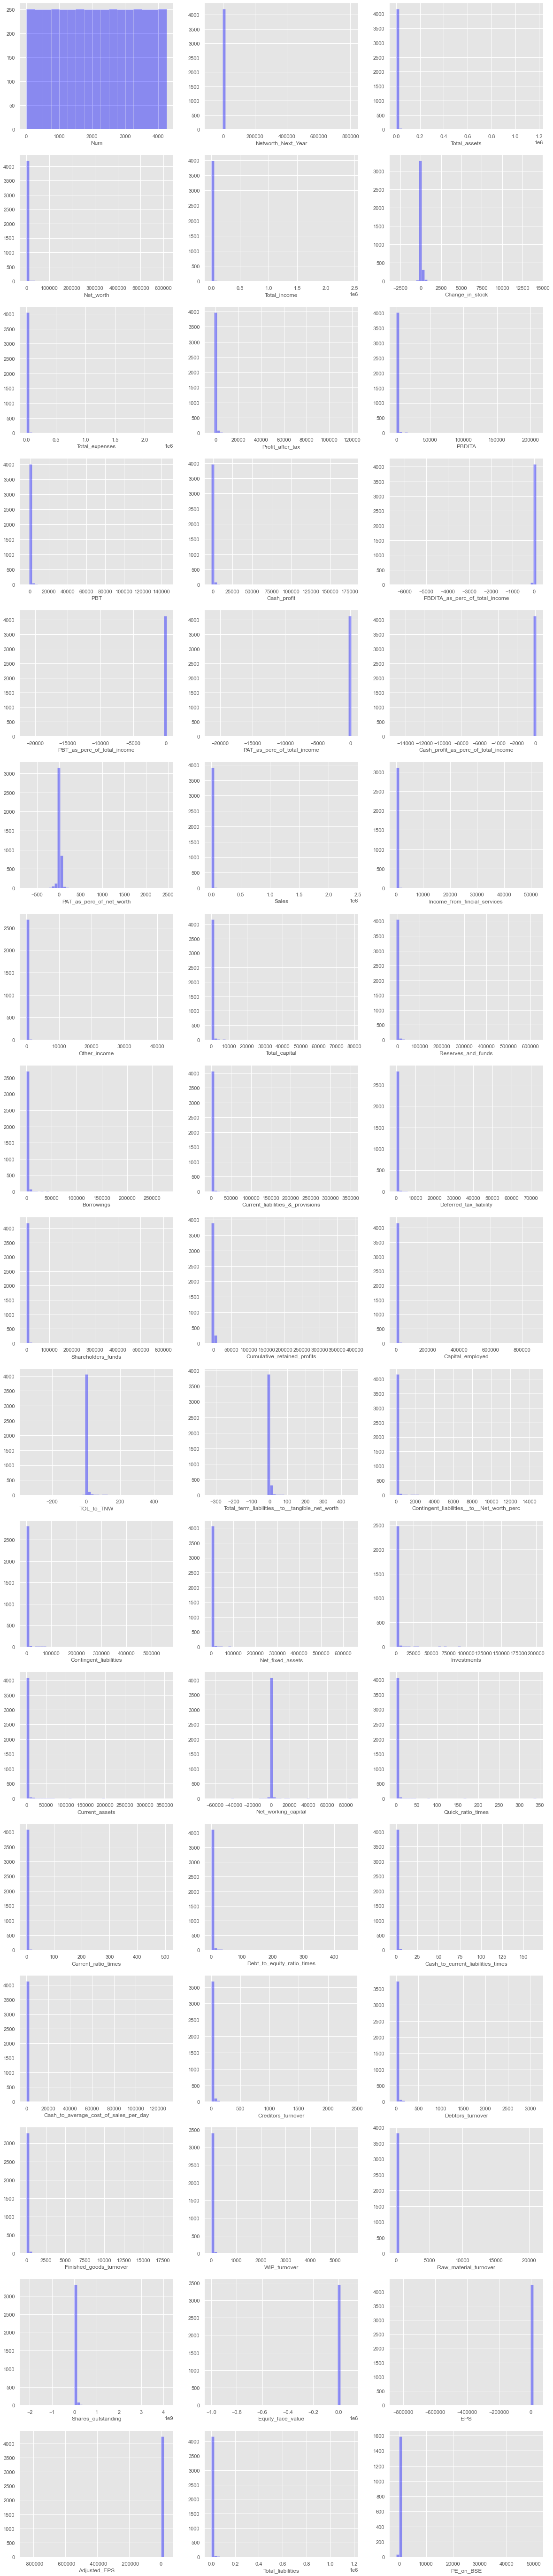

In [179]:
fig, ax = plt.subplots(figsize = (20, 100), nrows = 17, ncols = 3)

for i, col in enumerate(df.columns):
        sns.distplot(df[col], ax = ax[i//3, i%3], kde = False, color = 'blue')

In [14]:
#Checking Skewness of variabes in Dataset
pd.DataFrame(df.skew().sort_values(ascending=False),columns=['Skewness'])

,Skewness
Raw_material_turnover,60.61
Income_from_fincial_services,40.46
Cash_to_average_cost_of_sales_per_day,38.84
Contingent_liabilities,37.76
Net_fixed_assets,37.62
PE_on_BSE,37.20
Networth_Next_Year,36.38
Other_income,35.59
Reserves_and_funds,34.11
Current_ratio_times,33.28


#### Data Insights:
Skewness is a measure of the asymmetry in the distribution of a variable. It provides insights into the shape and characteristics of the data distribution. Understanding the skewness can help in identifying potential data transformation needs or selecting appropriate statistical methods for analysis.The skewness indicate the degree of skewness in each variable. Positive skewness indicates a right-skewed distribution, while negative skewness indicates a left-skewed distribution.

Here are some insights based on the skewness values:

Positive Skewness (Right-skewed distribution):

The disrtibution of Data from 60.61 to 8.64 having Positive skewness.Which indicates a longer or fatter tail on the right side of the distribution._

Negative Skewness (Left-skewed distribution):

The disrtibution of Data from 29.03 to 63.29 having Negative skewness
This indicates that the majority of the data points are concentrated on the right side of the distribution, with a long tail on the left side.
The skewness basiccally indicates the probabal presence of Lower(Negative skewness) & higher (Positive Skewness) Outliers or Values in data set.

### Dependent variable Creation on  variable Net Worth Next Year
We need to create a default variable that should take a value of 1 when
the net worth next year is negative and 0 when the net worth next year is positive.

In [15]:
#Creating a binary target variable for networth next year

df['Default'] = np.where((df['Networth_Next_Year'] > 0), 0, 1)

In [16]:
#Checking for top 10 records networth next year and default column

display(df[['Default','Networth_Next_Year']].head(5),df[['Default','Networth_Next_Year']].tail(5))

,Default,Networth_Next_Year
0,0,395.30
1,0,36.20
2,0,84.00
3,0,2041.40
4,0,41.80


,Default,Networth_Next_Year
4251,0,0.20
4252,0,93.30
4253,0,932.20
4254,0,64.60
4255,1,0.00


In [17]:
# Value count of Target Variable 0 and 1
df['Default'].value_counts()

0    3352
1     904
Name: Default, dtype: int64

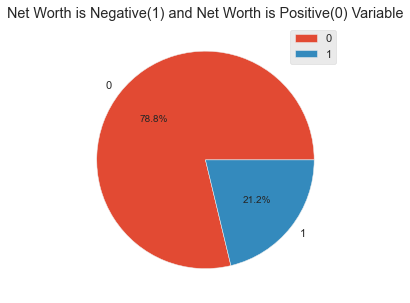

In [18]:
#Value Counts of Categorical variable-Vote
plt.figure(figsize=(5,5))
plt.pie(df["Default"].value_counts(),labels=df["Default"].value_counts().index,autopct='%1.1f%%')
plt.legend()
plt.title('Net Worth is Negative(1) and Net Worth is Positive(0) Variable')
plt.grid()
plt.show()

### Multivariate Analysis
We also performed multi variate analsysis on the data to see if there are any correlation that are observed within the data. Correlations function was used and seaborn heatmap is using to plot the correlations and to make better sense of the data.\
We observed that networth and networth next year were highly correlated. Apart from this, we also found various variables were highly correlated. This analysis will illustrate the collinearity with the data set

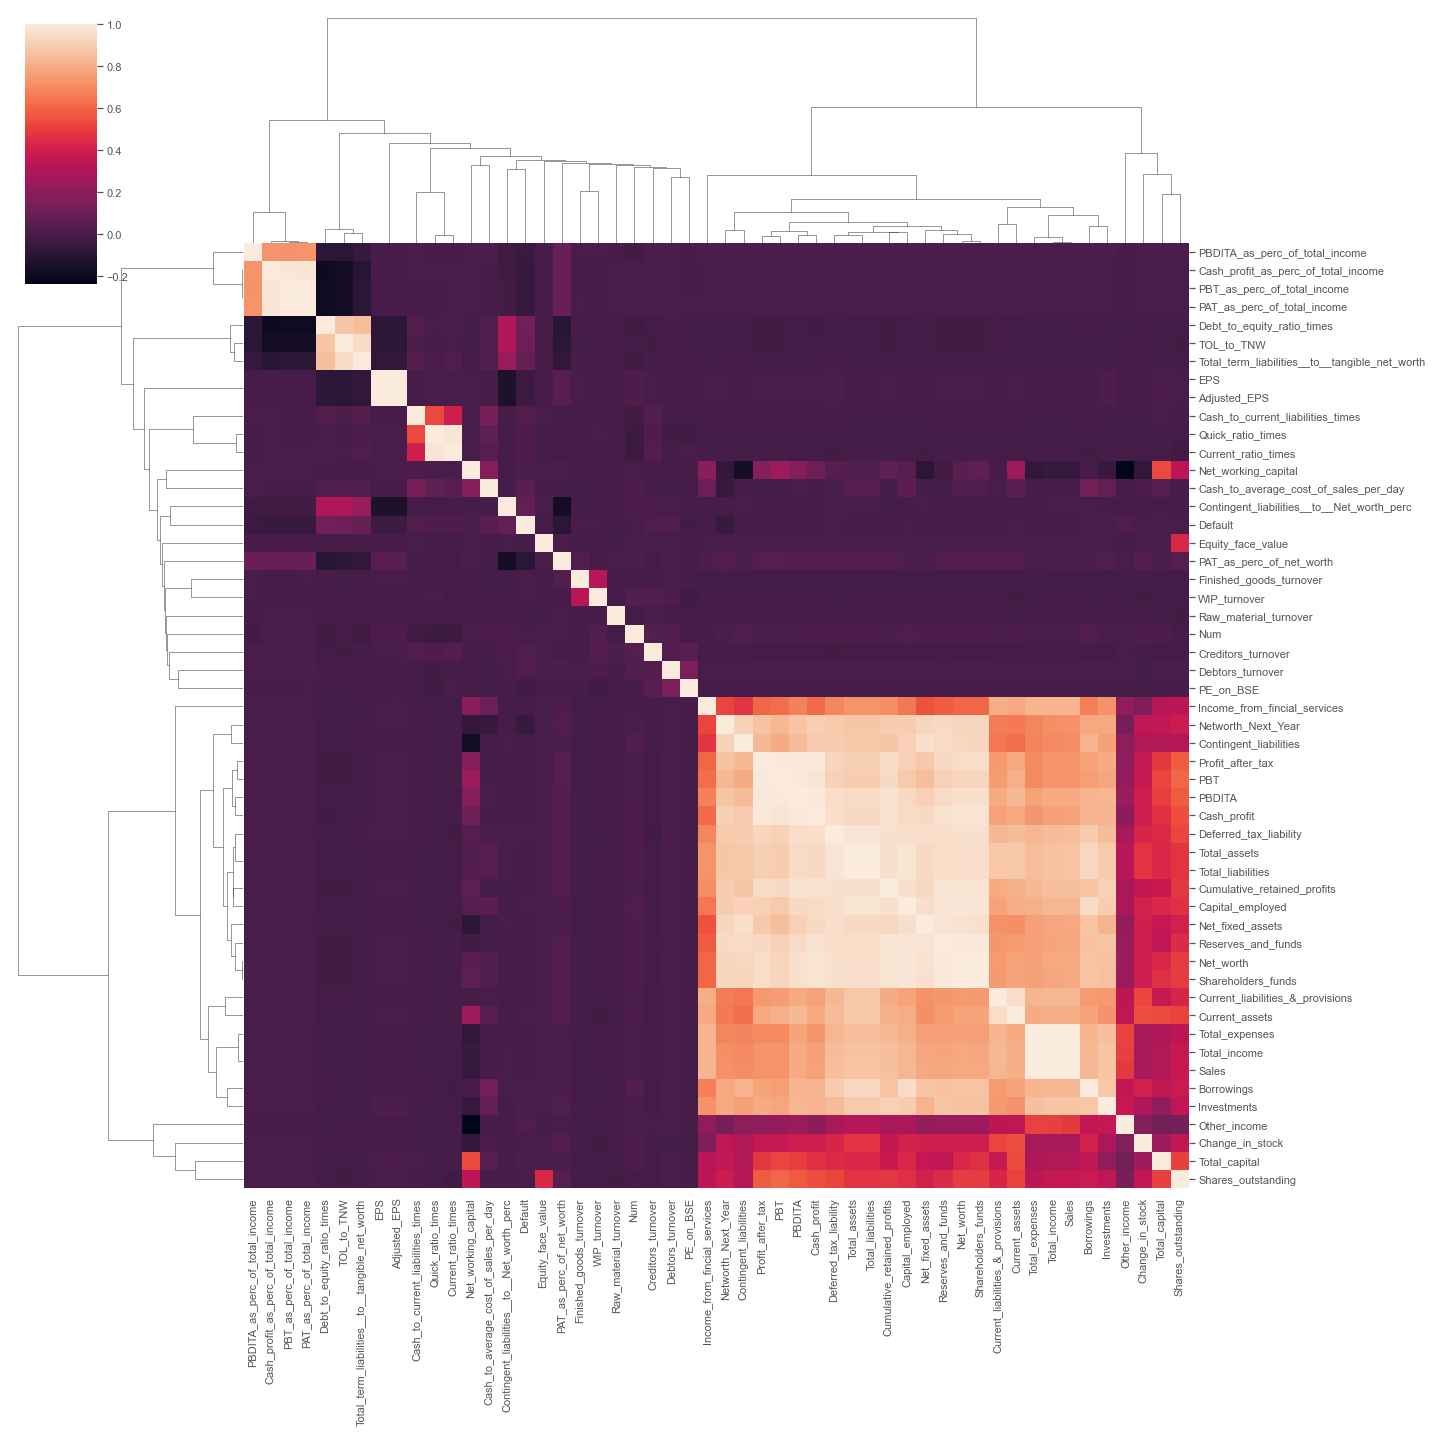

In [1223]:
sns.clustermap(df.corr(),figsize=(20,20));

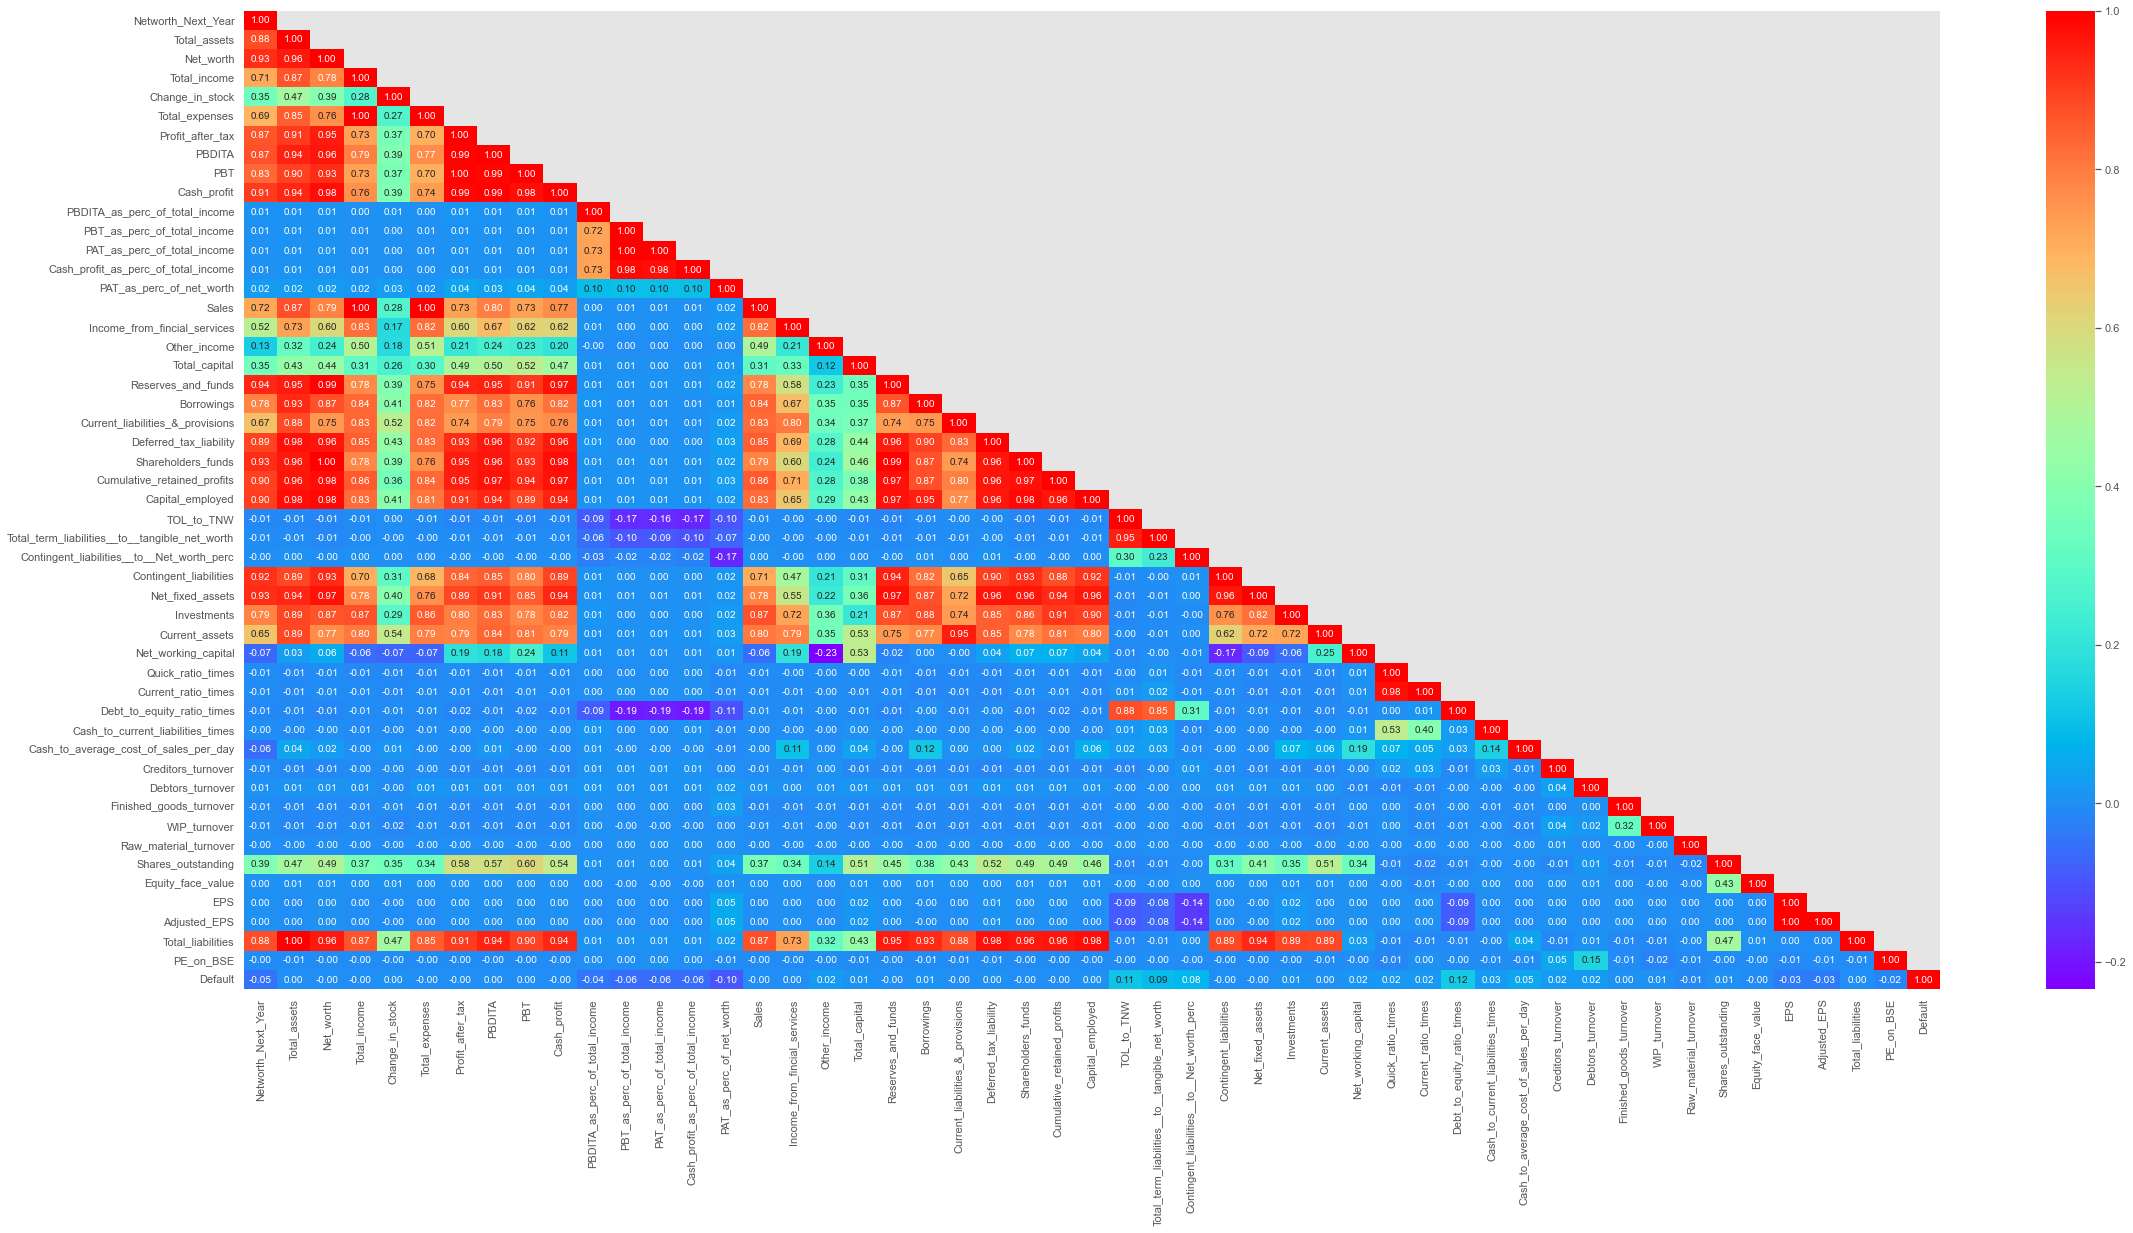

In [19]:
#checking correlation plot for multi collinearity check
corr=df.corr()
plt.figure(figsize=(38,18))
sns.heatmap(df.iloc[:,1:54].corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.iloc[:,1:54].corr(),+1))
plt.show()

In [20]:
df1=df.drop(labels=['Total_liabilities','Current_assets','Investments','Net_fixed_assets','Contingent_liabilities','Capital_employed','Cumulative_retained_profits','Shareholders_funds','Deferred_tax_liability','Current_liabilities_&_provisions','Borrowings','Reserves_and_funds','Income_from_fincial_services','Sales','Cash_profit_as_perc_of_total_income','PAT_as_perc_of_total_income','PBT_as_perc_of_total_income','PBDITA','PBT','Cash_profit','Profit_after_tax','Total_expenses','Total_income','Net_worth','Total_assets','Quick_ratio_times','Adjusted_EPS','Debt_to_equity_ratio_times','TOL_to_TNW','Total_capital'],axis=1)
df1.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Change_in_stock                                 3706 non-null   float64
 3   PBDITA_as_perc_of_total_income                  4177 non-null   float64
 4   PAT_as_perc_of_net_worth                        4256 non-null   float64
 5   Other_income                                    2700 non-null   float64
 6   Total_term_liabilities__to__tangible_net_worth  4256 non-null   float64
 7   Contingent_liabilities__to__Net_worth_perc      4256 non-null   float64
 8   Net_working_capital                             4219 non-null   float64
 9   Current_ratio_times                      

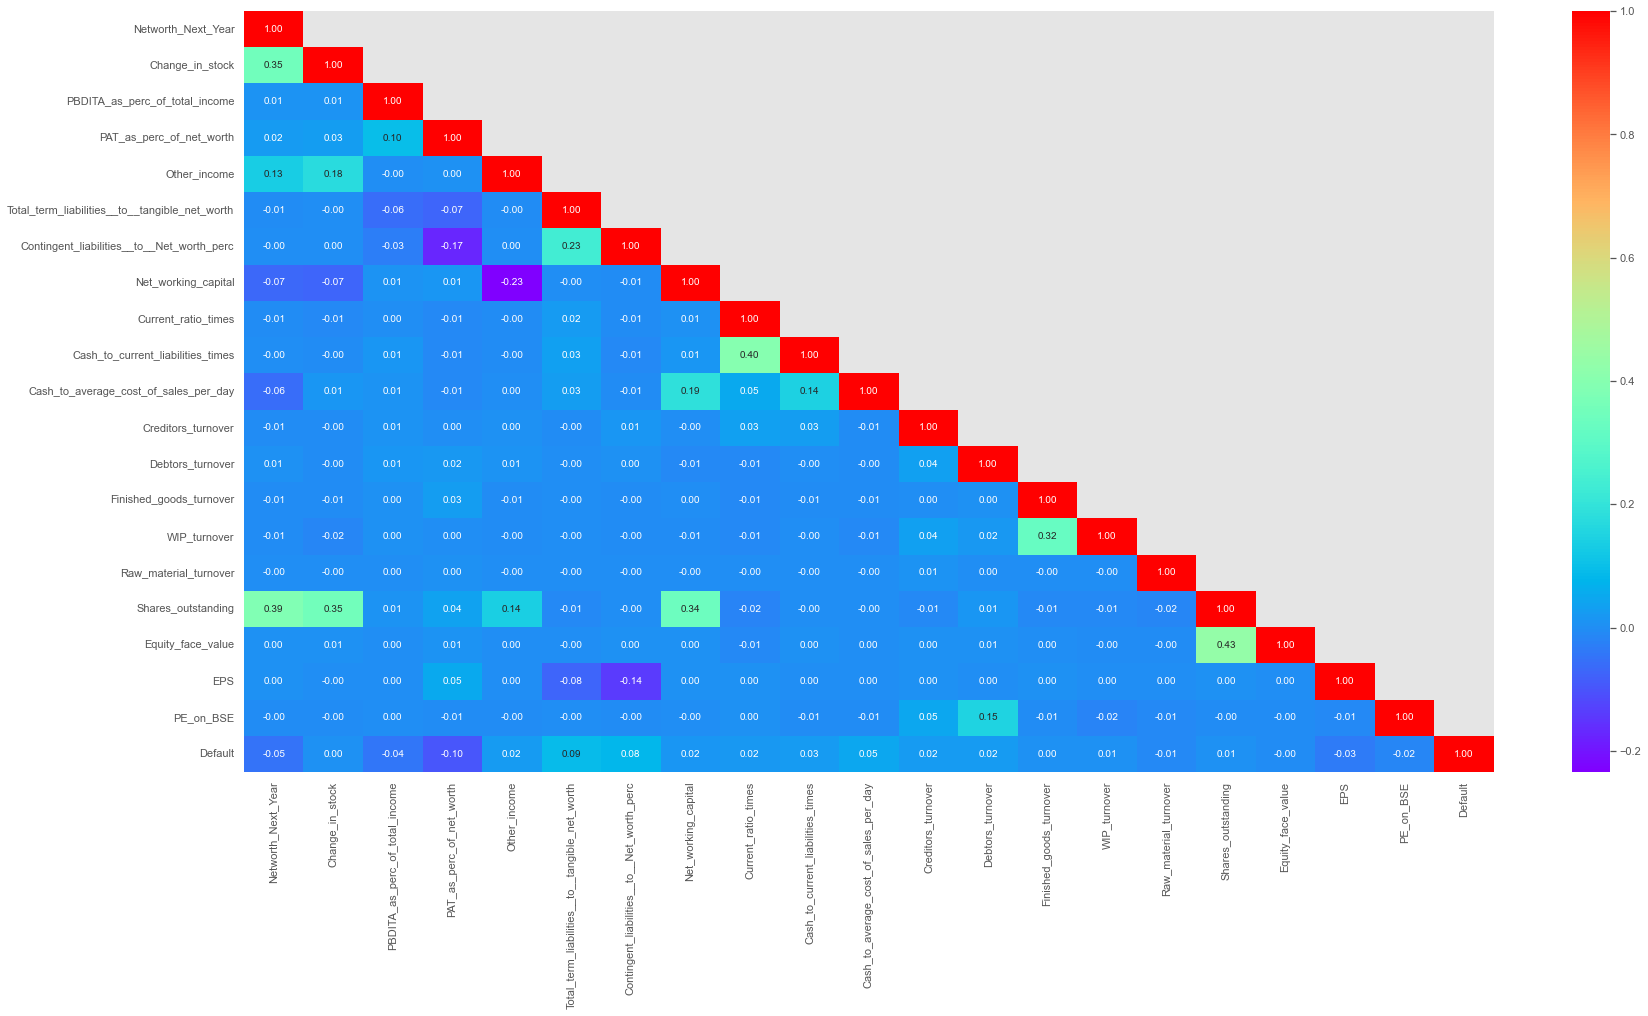

In [21]:
#checking correlation plot for multi collinearity check
corr=df1.corr()
plt.figure(figsize=(28,14))
sns.heatmap(df1.iloc[:,1:54].corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df1.iloc[:,1:54].corr(),+1))
plt.show()

In [22]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = df1.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.5)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

,,correlation


### Analysing Networth_Next_Year variable, since on the basis of this variable we will define the dependent variable

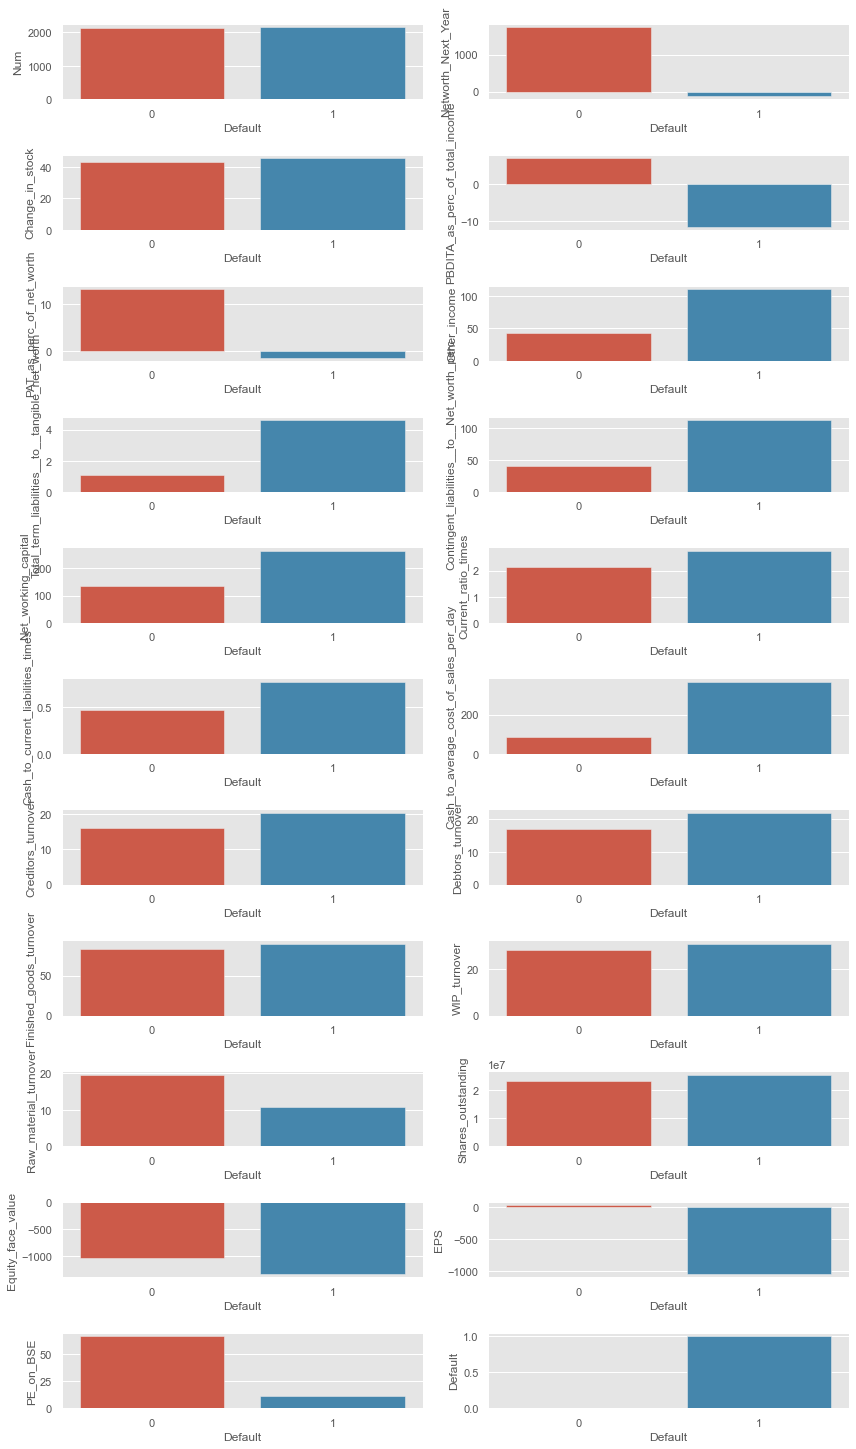

In [25]:
# Univariate Analysis
fig, ax = plt.subplots(figsize = (12, 20), nrows = 11, ncols = 2)

for i, col in enumerate(df1.columns):
    sns.barplot(x = df1['Default'], y =df1[col], ax = ax[i//2, i%2],ci=None)
    
plt.tight_layout(pad = 1.1)

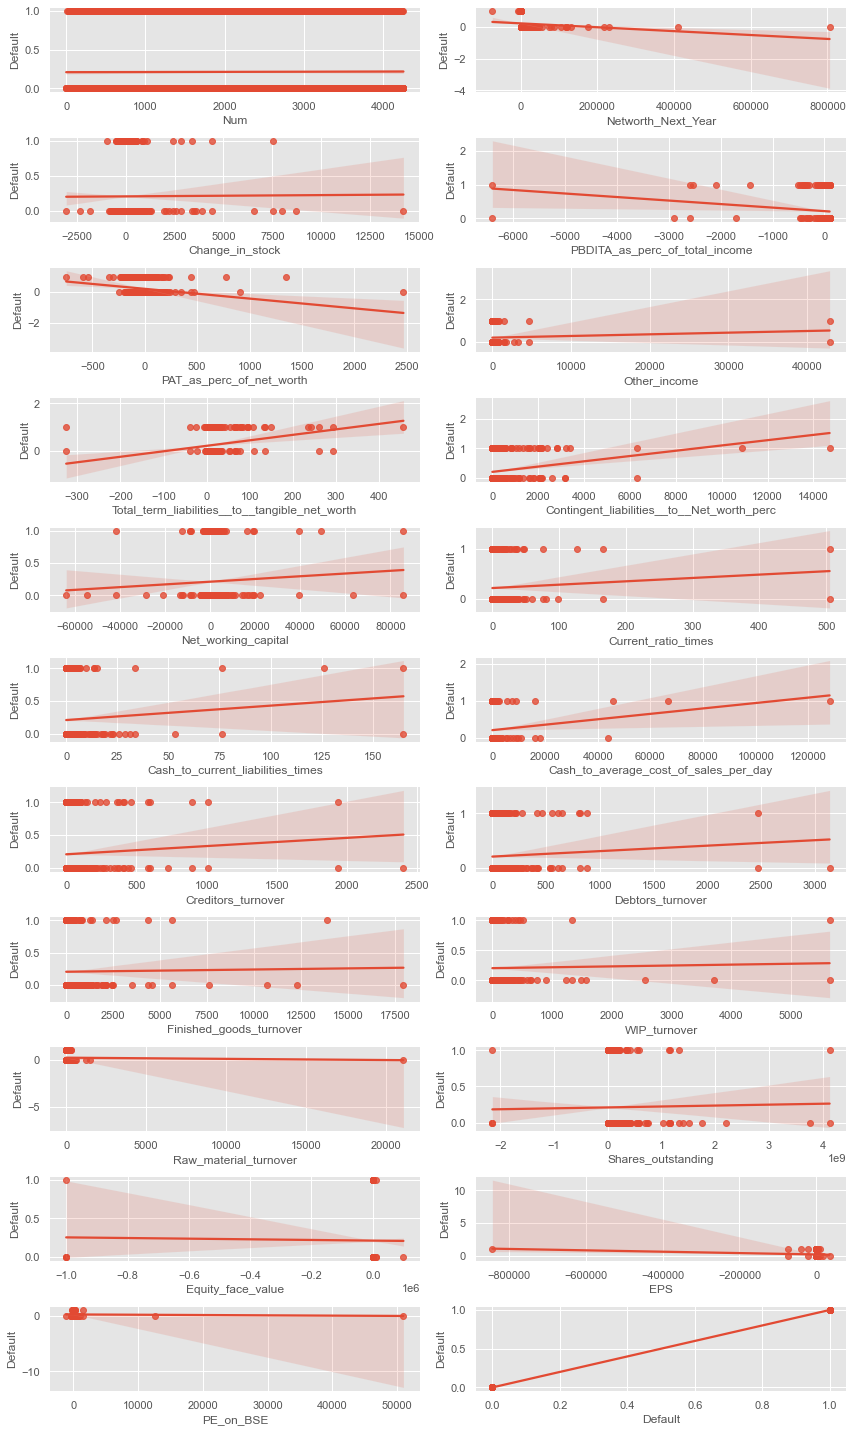

In [26]:
# Bivariate Analysis
fig, ax = plt.subplots(figsize = (12, 20), nrows = 11, ncols = 2)

for i, col in enumerate(df1.columns):
    sns.regplot(x = df1[col], y = df1['Default'], ax = ax[i//2, i%2])
    
plt.tight_layout(pad = 1.1)

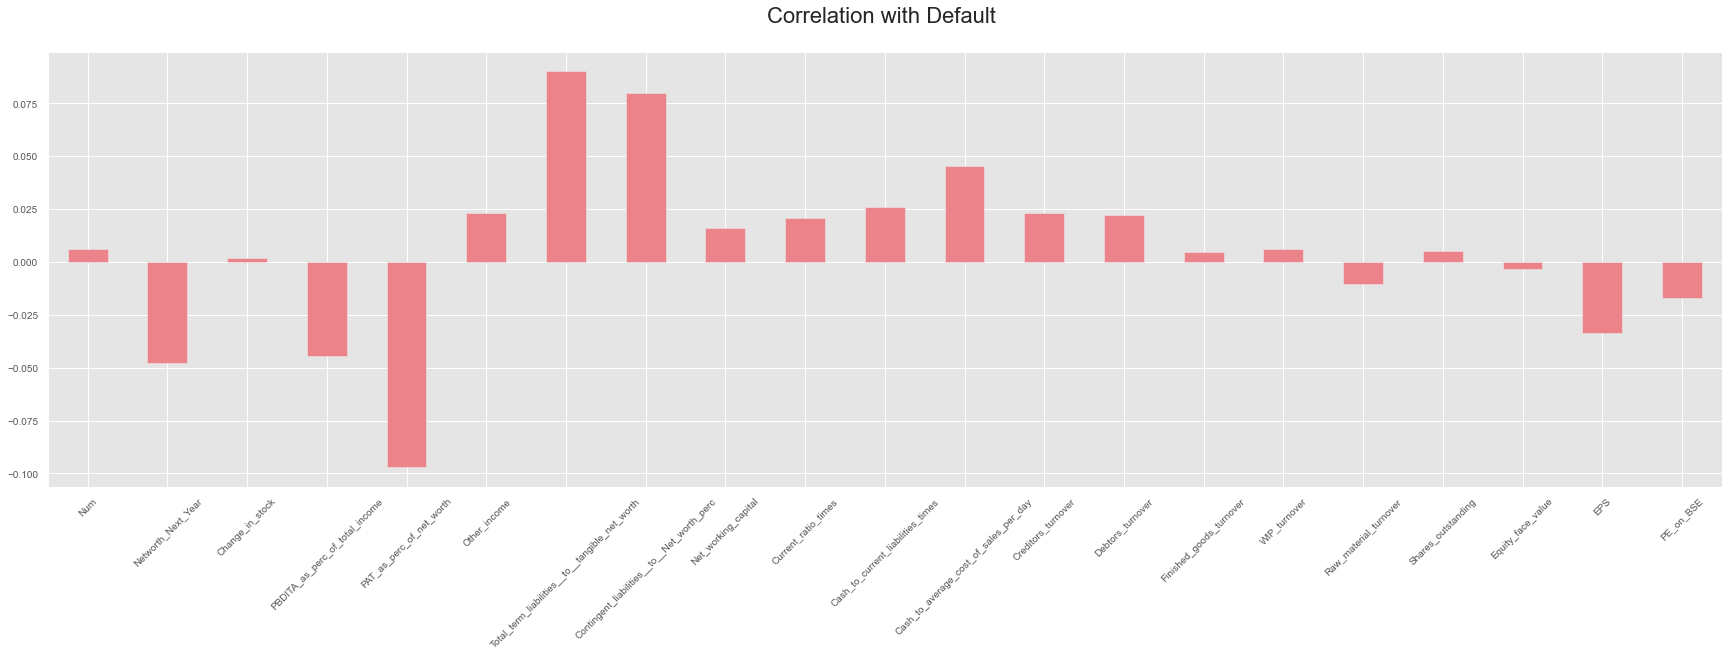

In [1228]:
# Plot Correlatioin with Default
correlations = df1.corrwith(df1.Default)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (30, 8), 
        fontsize = 10, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Default \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif");

In [1229]:
df1.shape

(4256, 22)

In [1230]:
df1.groupby(df['Default']).sum()

,Num,Networth_Next_Year,Change_in_stock,PBDITA_as_perc_of_total_income,PAT_as_perc_of_net_worth,Other_income,Total_term_liabilities__to__tangible_net_worth,Contingent_liabilities__to__Net_worth_perc,Net_working_capital,Current_ratio_times,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,PE_on_BSE,Default
Default,,,,,,,,,,,,,,,,,,,,,
0,7122033,5827019.80,127644.20,23468.49,44457.33,91802.30,3726.12,135271.45,451567.70,6950.35,...,48706.09,51894.35,223003.56,78447.34,59379.38,63318844505.00,-2807127.20,106340.29,86497.50,0
1,1936863,-103802.60,34317.20,-10186.08,-1182.91,59270.50,4165.73,101819.67,235598.70,2420.11,...,16273.29,17508.92,62335.74,21718.98,8506.09,18575033823.00,-965652.40,-941441.83,3850.57,904


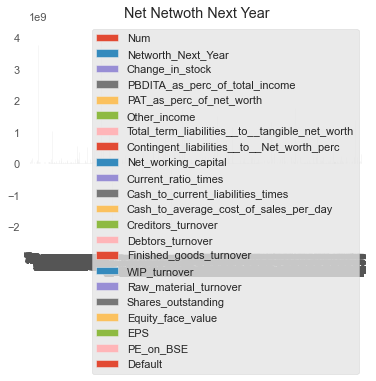

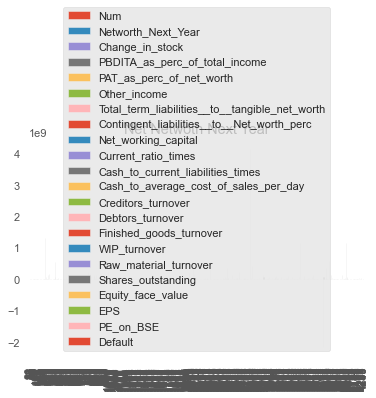

In [31]:
df1.groupby(df['Default']).plot(kind='bar', title = 'Net Netwoth Next Year');

#### Outlier Detection

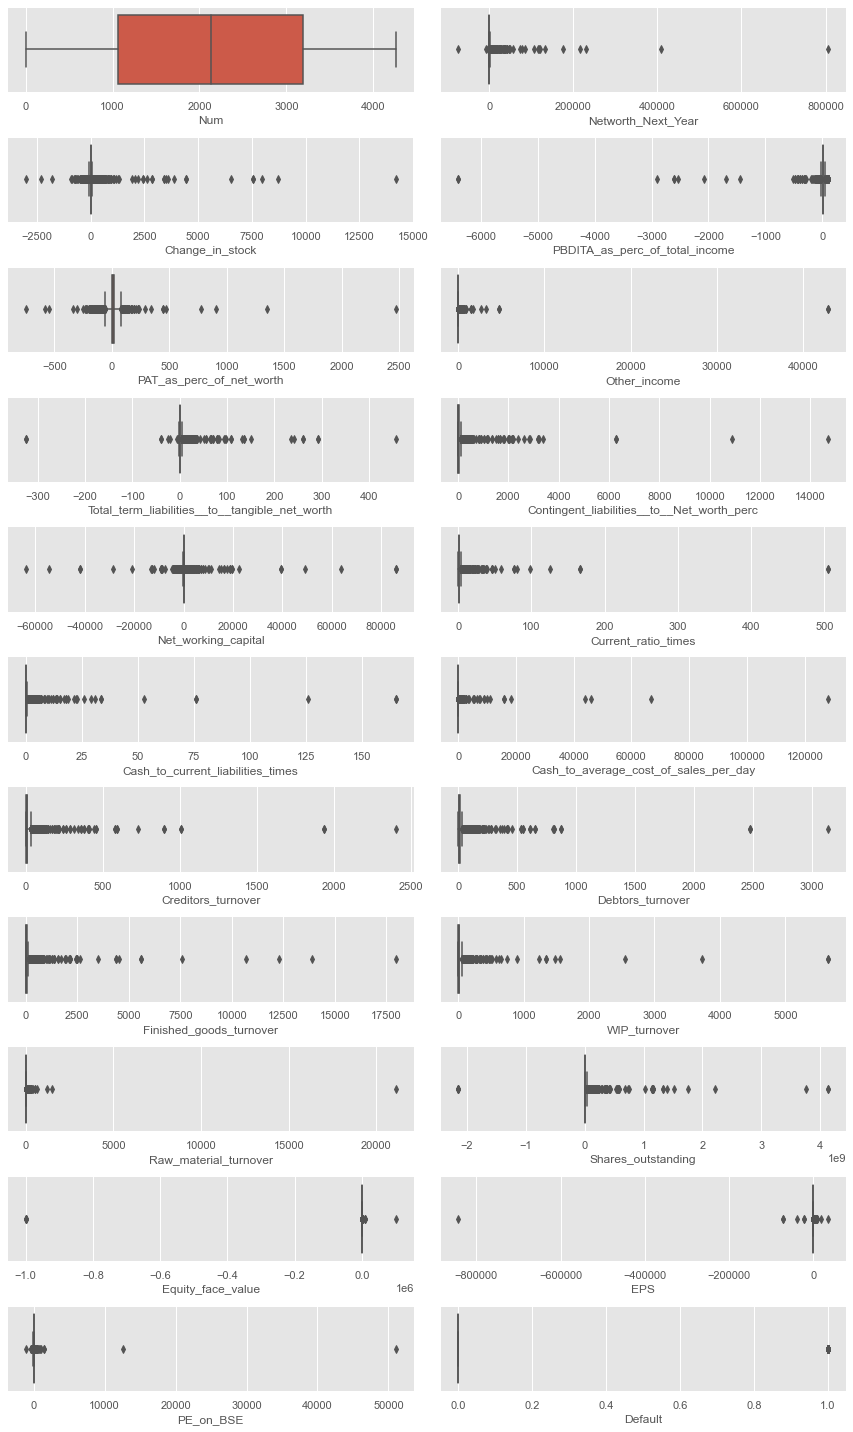

In [27]:
#boxplots with extreme whiskers (+/- 3*IQR)

fig, ax = plt.subplots(figsize = (12, 20), nrows = 11, ncols = 2)

for i, col in enumerate(df1.columns):
    sns.boxplot(x = df1[col], ax = ax[i//2, i%2], whis = 3) #extreme whiskers
    
plt.tight_layout(pad = 1.1)

#### Insight on Outliers:
There are presence of both lower and upper outlier with each variable.
Some variables like current ratio times,cost to avarage cost of sales per day,cash to current liability times,Creditors turn over,finished goods turnover,WIP turnover,Share outstandings,Debitor turnover,Contigent libility to networth perc

### Missing Value and Outlier Analysis

In [1231]:
# Breaking the Dataset into X and y variable for outlier and Missing value detection and imputation
df_X = df1.drop('Default', axis = 1)
df_y = df1['Default']

In [1232]:
# Checking the actual Missing Values in percentage
df_X.isnull().sum().sort_values(ascending = False)/df_X.index.size

PE_on_BSE                                        0.62
Other_income                                     0.37
Finished_goods_turnover                          0.21
Equity_face_value                                0.19
Shares_outstanding                               0.19
WIP_turnover                                     0.18
Change_in_stock                                  0.13
Raw_material_turnover                            0.10
Creditors_turnover                               0.09
Debtors_turnover                                 0.09
Cash_to_current_liabilities_times                0.02
Current_ratio_times                              0.02
Cash_to_average_cost_of_sales_per_day            0.02
PBDITA_as_perc_of_total_income                   0.02
Net_working_capital                              0.01
Networth_Next_Year                               0.00
Contingent_liabilities__to__Net_worth_perc       0.00
Total_term_liabilities__to__tangible_net_worth   0.00
PAT_as_perc_of_net_worth    

### Outlier Analysis

In [1233]:
#outlier analysis
Q1 = df_X.quantile(0.05)
Q3 = df_X.quantile(0.95)
IQR = Q3 - Q1
UL = Q3 + 3*IQR
LL = Q1 - 3*IQR

#### Insights:
Q1: It represents the first quartile, which is the value below which 25% of the data falls. It is calculated by finding the value that separates the lowest 25% of the data from the upper 75% of the data.

Q3: It represents the third quartile, which is the value below which 75% of the data falls. It is calculated by finding the value that separates the lowest 75% of the data from the upper 25% of the data.

IQR: It stands for the interquartile range, which is the range between the first quartile (Q1) and the third quartile (Q3). It provides a measure of the spread or dispersion of the data.

UL: It represents the upper limit for outlier detection. It is calculated by adding 3 times the IQR to the third quartile (Q3). Any data point above this upper limit is considered a potential outlier.

LL: It represents the lower limit for outlier detection. It is calculated by subtracting 3 times the IQR from the first quartile (Q1). Any data point below this lower limit is considered a potential outlier.

By using the more stringent threshold of 3 times the IQR, values that are even further from the central distribution of the data are flagged as potential outliers. Using this approach because in this case the stricter outlier detection is desired, datasets having the extreme values or high variability.

In [1234]:
((df_X > UL) | (df_X < LL)).sum().sort_values(ascending=False)

EPS                                               104
Net_working_capital                                83
Total_term_liabilities__to__tangible_net_worth     71
Cash_to_average_cost_of_sales_per_day              61
Networth_Next_Year                                 57
Current_ratio_times                                53
Cash_to_current_liabilities_times                  52
Contingent_liabilities__to__Net_worth_perc         50
Finished_goods_turnover                            47
Shares_outstanding                                 47
Other_income                                       46
Equity_face_value                                  45
Debtors_turnover                                   45
Change_in_stock                                    41
Creditors_turnover                                 38
PBDITA_as_perc_of_total_income                     36
WIP_turnover                                       30
Raw_material_turnover                              30
PE_on_BSE                   

In [1235]:
df_X[((df_X > UL) | (df_X < LL))]= np.nan

In [1236]:
# Percentage of total Missing values(Outliers+ actual Miisings) per variable
df_X.isnull().sum().sort_values(ascending = False)/df_X.index.size

PE_on_BSE                                        0.62
Other_income                                     0.38
Finished_goods_turnover                          0.22
Shares_outstanding                               0.20
Equity_face_value                                0.20
WIP_turnover                                     0.19
Change_in_stock                                  0.14
Raw_material_turnover                            0.11
Debtors_turnover                                 0.10
Creditors_turnover                               0.10
Cash_to_average_cost_of_sales_per_day            0.04
Current_ratio_times                              0.04
Cash_to_current_liabilities_times                0.04
Net_working_capital                              0.03
PBDITA_as_perc_of_total_income                   0.03
EPS                                              0.02
Total_term_liabilities__to__tangible_net_worth   0.02
Networth_Next_Year                               0.01
Contingent_liabilities__to__

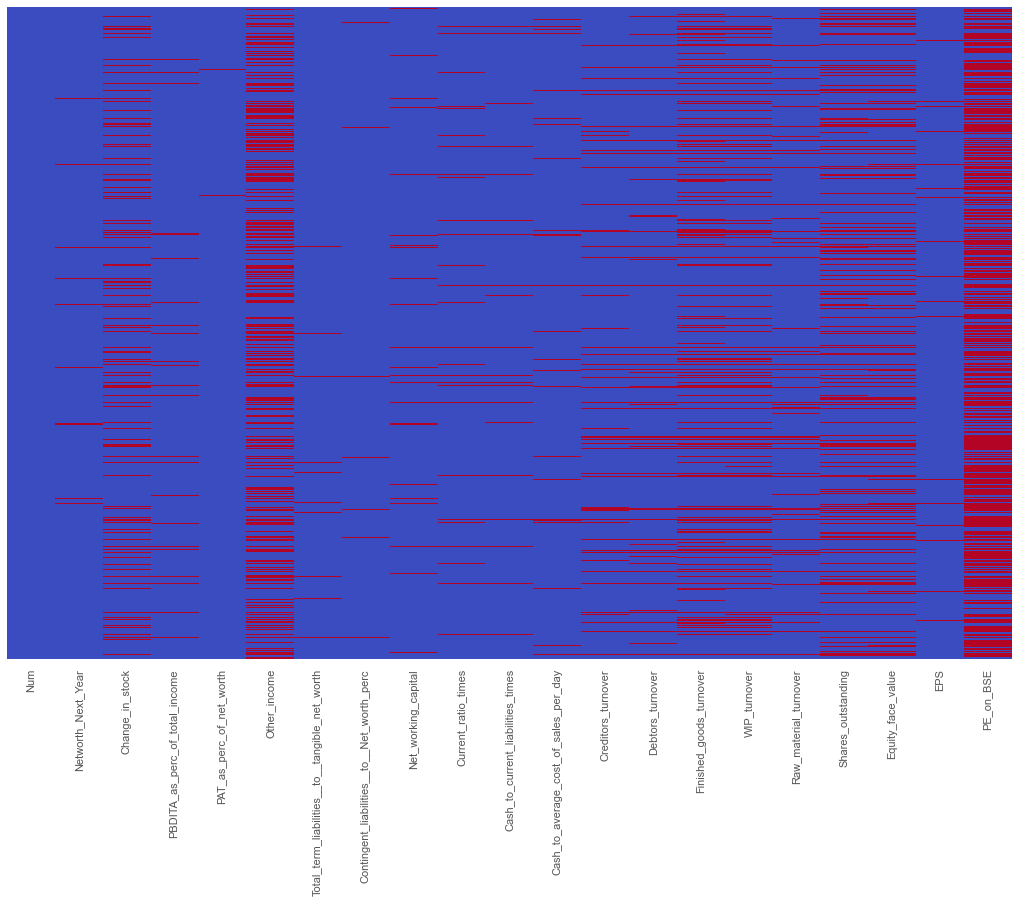

In [1237]:
# Visualisation of Missing Values
plt.figure(figsize = (18,12))
sns.heatmap(df_X.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [1238]:
# Total Missing in as Null in Dataset
df.isnull().sum().sum()

17778

In [1239]:
# Consolidated Missing values in dataset
df_X.isnull().sum().sum()

10590

In [1241]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 21 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4199 non-null   float64
 2   Change_in_stock                                 3665 non-null   float64
 3   PBDITA_as_perc_of_total_income                  4141 non-null   float64
 4   PAT_as_perc_of_net_worth                        4243 non-null   float64
 5   Other_income                                    2654 non-null   float64
 6   Total_term_liabilities__to__tangible_net_worth  4185 non-null   float64
 7   Contingent_liabilities__to__Net_worth_perc      4206 non-null   float64
 8   Net_working_capital                             4136 non-null   float64
 9   Current_ratio_times                      

In [1242]:
# Dropping the variable above 30% of Missing values
df_X = df_X.drop(['Num','PE_on_BSE','Other_income','Networth_Next_Year',], axis = 1)
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 17 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Change_in_stock                                 3665 non-null   float64
 1   PBDITA_as_perc_of_total_income                  4141 non-null   float64
 2   PAT_as_perc_of_net_worth                        4243 non-null   float64
 3   Total_term_liabilities__to__tangible_net_worth  4185 non-null   float64
 4   Contingent_liabilities__to__Net_worth_perc      4206 non-null   float64
 5   Net_working_capital                             4136 non-null   float64
 6   Current_ratio_times                             4098 non-null   float64
 7   Cash_to_current_liabilities_times               4099 non-null   float64
 8   Cash_to_average_cost_of_sales_per_day           4095 non-null   float64
 9   Creditors_turnover                       

In [1243]:
#Concating the X and y for further treatment
df1 = pd.concat([df_X, df_y], axis =1 )

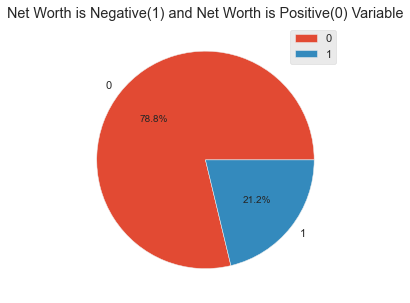

In [1244]:
#Value Counts of Categorical variable-Default
plt.figure(figsize=(5,5))

plt.pie(df1["Default"].value_counts(),labels=df1["Default"].value_counts().index,autopct='%1.1f%%')
plt.legend()
plt.title('Net Worth is Negative(1) and Net Worth is Positive(0) Variable')
plt.grid()
plt.show()

#### Finding Missing Value by each row

In [1245]:
# Finding the missing values by rows
df1.isnull().sum(axis = 1)

0       0
1       7
2       2
3       0
4       0
       ..
4251    8
4252    0
4253    0
4254    2
4255    0
Length: 4256, dtype: int64

In [1246]:
#filtering the data which is 90% or more complete at the row level
df1_temp = df[df1.isnull().sum(axis = 1) <= 5]

In [1247]:
# Checking the shape to dataset
print('The number of rows (observations) is',df1_temp.shape[0],'\n''The number of columns (variables) is',df1_temp.shape[1])

The number of rows (observations) is 3917 
The number of columns (variables) is 52


In [1248]:
#Checking the consolidated (Outlier+Actual Missing) missing value in percentage
df1.isnull().sum().sort_values(ascending = False)/df.index.size

Finished_goods_turnover                          0.22
Shares_outstanding                               0.20
Equity_face_value                                0.20
WIP_turnover                                     0.19
Change_in_stock                                  0.14
Raw_material_turnover                            0.11
Debtors_turnover                                 0.10
Creditors_turnover                               0.10
Cash_to_average_cost_of_sales_per_day            0.04
Current_ratio_times                              0.04
Cash_to_current_liabilities_times                0.04
Net_working_capital                              0.03
PBDITA_as_perc_of_total_income                   0.03
EPS                                              0.02
Total_term_liabilities__to__tangible_net_worth   0.02
Contingent_liabilities__to__Net_worth_perc       0.01
PAT_as_perc_of_net_worth                         0.00
Default                                          0.00
dtype: float64

##### Insights
Since the outliers are too large in the number.it will affect the model.but Also given the fact that this is a financial data and the outliers might very well reflect the information which is genuine in nature. Since data captured from different size of companies

Although most outliers have nan values which is a missing data which should be treated with missing data imputation method .here KNN imputation method is used

### Segregating the predictors and response

In [1249]:
#Creating Predictor and Response and dropping target variable from X axis
predictors = df1.drop('Default', axis = 1)
response = df1['Default']

#### Scale the predictors
It can also be a good idea to scale the target variable for regression predictive modeling problems to make the problem easier to learn.A target variable with a large spread of values, in turn, may result in large error gradient values causing weight values to change dramatically, making the learning process unstable.

Scaling input and output variables is a critical step in regression

Here StandardScaler is used for preprocessing the data.We will use the default configuration and scale values to subtract the mean to center them on 0.0 and divide by the standard deviation to give the standard deviation of 1.0. First, a StandardScaler instance is defined with default hyperparameters.

Once defined, we can call the fit_transform() function and pass it to our dataset to create a transformed version of our dataset.

In [1250]:
from sklearn.preprocessing import StandardScaler #Scaling train and test separately
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [1251]:
# Concating the Predictor and Response 
df2 = pd.concat([scaled_predictors, response], axis = 1)

#### Imputing the remaining missing values by KNN
For this dataset, converted the outlier to null values so that both can be treat together using KNN imputer. KNN method is to identify ‘k’ samples in the dataset that are similar to other data points. Then using these ‘k’ samples to estimate the value of the missing data. Each missing values are imputed using the mean value of the k-neighbours found in the dataset.

In [2]:
from sklearn.impute import KNNImputer #MICE FancyImpute
imputer = KNNImputer(n_neighbors=5)

In [3]:
df_imputed = pd.DataFrame(imputer.fit_transform(df2), columns = df2.columns)

NameError: name 'pd' is not defined

In [ ]:
df_imputed.isnull().sum()

#### Inspect possible correlations between independent variables

<AxesSubplot:>

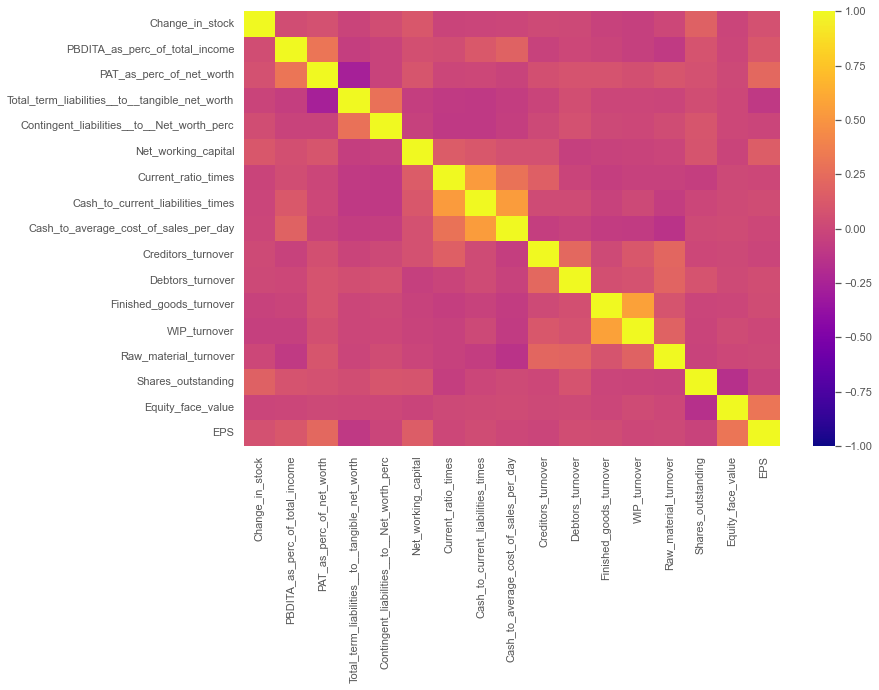

In [1255]:
plt.figure(figsize = (12,8))
cor_matrix = df_imputed.drop('Default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

### Feature Selction
Since there are too many columns, we need to determine the columns which are related and eliminate them if possible. We will use VIF to determine the collinearity and eliminate using a threshold of 5.

In [1256]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df_imputed ):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df_imputed.columns
    vif["VIF"] = [variance_inflation_factor(df_imputed .values, i) for i in range(df_imputed .shape[1])]

    return(vif)

In [1257]:
calc_vif(df_imputed).sort_values(by='VIF', ascending = False)

,variables,VIF
7,Cash_to_current_liabilities_times,1.87
12,WIP_turnover,1.55
6,Current_ratio_times,1.51
11,Finished_goods_turnover,1.50
8,Cash_to_average_cost_of_sales_per_day,1.49
2,PAT_as_perc_of_net_worth,1.30
16,EPS,1.21
3,Total_term_liabilities__to__tangible_net_worth,1.20
1,PBDITA_as_perc_of_total_income,1.18
9,Creditors_turnover,1.16


### Train Test Splite (67:33 ratio )
For the given business problem, ‘default’ is the target variable since the problem is to come up with a model to predict whether a particular company will default or not.\

    X – Independent variable (Removing ‘default’ variable)
    y – Dependent/ Target variable (Having only ‘default’ variable)
    
Next step is to Split the data into training and testing test. Splitting the data as 67% training and 33% testing with a random state = 42 and stratify = y.\
Output of this step will be: Training independent variable (X_train),\
Testing independent variable (X-test), Training dependent variable (y_train) and testing dependent variable (y_test).

In [1258]:
# Creating Predictor and response
predictors = df_imputed.drop('Default', axis = 1)
response = df_imputed['Default']

In [1259]:
X = df_imputed.drop('Default', axis = 1)
y = df_imputed['Default']

In [1260]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, 
                                                    test_size = 0.33,stratify=y,random_state = 42)

### Description of Train Test Split
Train_test_split function from scikit-learn to split the data into training and testing sets. The test_size parameter is set to 0.33, which means that approximately 33% of the data will be allocated for testing, and the remaining 67% will be used for training.

The stratify parameter is set to y, which means that the data will be stratified based on the values of the y variable. This is useful due to dealing with imbalanced datasets, as it helps maintain the distribution of classes in both the training and testing sets. By setting stratify=y, We ensure that the proportion of different classes in the original dataset is preserved in the training and testing sets.

The random_state parameter is set to 42, which is used to ensure reproducibility. By setting a specific random state, the data will be split in the same way each time the code is run, making the results consistent

In [1261]:
# Dataset Shape and Target varaiable analysis before SMOTE
print("Before OverSampling the shape of X: {}".format(X.shape))
print("Before OverSampling the shape of y: {}".format(y.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

Before OverSampling the shape of X: (4256, 17)
Before OverSampling the shape of y: (4256,)
Before OverSampling, counts of label '1': 904
Before OverSampling, counts of label '0': 3352 



### Resampling using SMOTE

In [1262]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE on the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X, y)

#We can use the resampled data (X_train_resampled and y_train_resampled) for modeling

In [1263]:
# Dataset Shape and Target varaiable analysis After SMOTE
print("After OverSampling the shape of X: {}".format(X_train_resampled.shape))
print("After OverSampling the shape of y: {}".format(y_train_resampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_resampled==1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_resampled==0)))

After OverSampling the shape of X: (6704, 17)
After OverSampling the shape of y: (6704,)
After OverSampling, counts of label '1': 3352
After OverSampling, counts of label '0': 3352 



In [1264]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_train_resampled, y_train_resampled, test_size = 0.33,stratify=y_train_resampled,random_state = 42)

In [1265]:
# Shape of Resample data
print('Number of rows and columns of the training set for the independent variables:',X_train_resampled.shape)
print('Number of rows and columns of the training set for the dependent variable:',  y_train_resampled.shape )
print('Number of rows and columns of the test set for the independent variables:',  X_test_resampled.shape)
print('Number of rows and columns of the test set for the dependent variable:',     y_test_resampled.shape)

Number of rows and columns of the training set for the independent variables: (4491, 17)
Number of rows and columns of the training set for the dependent variable: (4491,)
Number of rows and columns of the test set for the independent variables: (2213, 17)
Number of rows and columns of the test set for the dependent variable: (2213,)


#### Concatinating X and y, so they can be used with statsmodel library

In [1266]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat ([X_test, y_test], axis = 1)

In [1267]:
# Shape of df train and Test
print("The shape of X: {}".format(df_train.shape))
print("The shape of y: {}".format(df_test.shape))


The shape of X: (2851, 18)
The shape of y: (1405, 18)


In [1268]:
## Concatenate predictor variables and target variable
df_train_smote = pd.concat([X_train_resampled, pd.DataFrame(y_train_resampled, columns=['Default'], index=X_train_resampled.index)], axis=1)
df_test_smote = pd.concat([X_test_resampled, pd.DataFrame(y_test_resampled, index=X_test_resampled.index)], axis=1)

In [1269]:
# Shape of df Smote train and Test
print("The shape of X: {}".format(df_train_smote.shape))
print("The shape of y: {}".format(df_test_smote.shape))


The shape of X: (4491, 18)
The shape of y: (2213, 18)


In [1270]:
# Segregating variables for further analysis wrt to target variable Default
col=[]
for i in df_train.columns[:-1]:
    col.append(i)

In [1271]:
col

['Change_in_stock',
 'PBDITA_as_perc_of_total_income',
 'PAT_as_perc_of_net_worth',
 'Total_term_liabilities__to__tangible_net_worth',
 'Contingent_liabilities__to__Net_worth_perc',
 'Net_working_capital',
 'Current_ratio_times',
 'Cash_to_current_liabilities_times',
 'Cash_to_average_cost_of_sales_per_day',
 'Creditors_turnover',
 'Debtors_turnover',
 'Finished_goods_turnover',
 'WIP_turnover',
 'Raw_material_turnover',
 'Shares_outstanding',
 'Equity_face_value',
 'EPS']

In [1272]:
# Creating the variable formula wrt Default for modelling
formula = 'Default ~ ' + ' + '.join(col)
formula

'Default ~ Change_in_stock + PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Net_working_capital + Current_ratio_times + Cash_to_current_liabilities_times + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover + Shares_outstanding + Equity_face_value + EPS'

##  Modelling 

## The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is
# y = $\frac{1}{1 + {e^{-z}}}$

### Note: z  = $\beta_0$ +${\sum_{i=1}^{n}(\beta_i  X_1)}$

### Statsmodels Logit Modeling with backward elimination.
#### After each model is built, the variable that has a p-value of >0.05 will be dropped as their coefficients are unreliable.

The assumptions of the Statsmodels classification process are as follows:

The independent variables are linearly related to the dependent variable. This means that the relationship between the independent variables and the dependent variable can be described by a straight line.
The error terms are normally distributed. This means that the errors in the model are randomly distributed around zero and have a constant variance.
The independent variables are not perfectly correlated with each other. This means that the independent variables are not perfectly related to each other.

In [1273]:
#Creating Model number 1 on train data
model1 = SM.logit(formula = formula, data = df_train).fit()
print(model1.summary())
model1.pvalues.sort_values(ascending = False).head()

Optimization terminated successfully.
         Current function value: 0.495117
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2851
Model:                          Logit   Df Residuals:                     2833
Method:                           MLE   Df Model:                           17
Date:                Sat, 17 Jun 2023   Pseudo R-squ.:                 0.04293
Time:                        16:29:35   Log-Likelihood:                -1411.6
converged:                       True   LL-Null:                       -1474.9
Covariance Type:            nonrobust   LLR p-value:                 8.321e-19
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                           

Debtors_turnover                             0.82
Equity_face_value                            0.77
Cash_to_average_cost_of_sales_per_day        0.77
Creditors_turnover                           0.69
Contingent_liabilities__to__Net_worth_perc   0.61
dtype: float64

In [1274]:
col2=['Change_in_stock',
 'PBDITA_as_perc_of_total_income',
 'PAT_as_perc_of_net_worth',
 'Total_term_liabilities__to__tangible_net_worth',
 'Contingent_liabilities__to__Net_worth_perc', 
 'Current_ratio_times',
 'Cash_to_current_liabilities_times',
 'Cash_to_average_cost_of_sales_per_day',
 'Creditors_turnover', 
 'Finished_goods_turnover',
 'WIP_turnover',
 'Raw_material_turnover', 
 'Equity_face_value']

col2

['Change_in_stock',
 'PBDITA_as_perc_of_total_income',
 'PAT_as_perc_of_net_worth',
 'Total_term_liabilities__to__tangible_net_worth',
 'Contingent_liabilities__to__Net_worth_perc',
 'Current_ratio_times',
 'Cash_to_current_liabilities_times',
 'Cash_to_average_cost_of_sales_per_day',
 'Creditors_turnover',
 'Finished_goods_turnover',
 'WIP_turnover',
 'Raw_material_turnover',
 'Equity_face_value']

In [1275]:
formula2 = 'Default ~ ' + ' + '.join(col2)
formula2

'Default ~ Change_in_stock + PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Current_ratio_times + Cash_to_current_liabilities_times + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover + Equity_face_value'

In [1276]:
#Creating Model number 2 on train data
model2 = SM.logit(formula = formula2, data = df_train).fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.495573
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2851
Model:                          Logit   Df Residuals:                     2837
Method:                           MLE   Df Model:                           13
Date:                Sat, 17 Jun 2023   Pseudo R-squ.:                 0.04205
Time:                        16:29:38   Log-Likelihood:                -1412.9
converged:                       True   LL-Null:                       -1474.9
Covariance Type:            nonrobust   LLR p-value:                 3.206e-20
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                           

In [1277]:
model2.pvalues.sort_values(ascending = False).head()

Equity_face_value                            0.88
Cash_to_average_cost_of_sales_per_day        0.82
Creditors_turnover                           0.72
Contingent_liabilities__to__Net_worth_perc   0.61
PBDITA_as_perc_of_total_income               0.40
dtype: float64

#### Model Summary Insights: 

Optimization terminated successfully: This indicates that the optimization algorithm used to estimate the model parameters converged without any issues.

Current function value: 0.501690: This represents the value of the objective function (log-likelihood) at the estimated parameter values. In this case, the value is 0.501690.

Iterations 6: It took 6 iterations for the optimization algorithm to converge and find the estimated parameter values.

Logit Regression Results: This section provides a summary of the logistic regression model.

Dep. Variable: Default: This is the dependent variable or the target variable in the logistic regression model.

No. Observations: 2851: This is the number of observations used to estimate the model.

Model: Logit: Indicates that the model used is a logistic regression model.

Df Residuals: 2839: Represents the degrees of freedom of the residuals.

Method: MLE (Maximum Likelihood Estimation): Indicates that the model was estimated using maximum likelihood estimation.

converged: True: Indicates that the optimization algorithm converged and found a solution.

LL-Null: -1491.7: Log-likelihood value of the null model (a model with no predictors). The lower the value, the better the model fit.

Pseudo R-squ.: 0.04118: Represents the pseudo R-squared value, which measures the proportion of variance explained by the model. In this case, the model explains about 4.12% of the variance.

Log-Likelihood: -1430.3: Log-likelihood value of the current model. The higher the value, the better the model fit.

Covariance Type: nonrobust: Indicates the type of covariance used in the model estimation.

LLR p-value: 4.843e-21: Represents the p-value of the likelihood ratio test, which compares the current model to the null model. A low p-value suggests that the current model significantly improves upon the null model.

Coefficients: This table provides the estimated coefficients for each predictor variable in the logistic regression model. Here's how to interpret the columns:

coef: The estimated coefficient for each predictor variable.

std err: The standard error associated with each coefficient estimate.

z: The z-statistic, which is the coefficient divided by its standard error. It measures the number of standard deviations the coefficient is away from zero.

P>|z|: The p-value associated with the z-statistic. It indicates the statistical significance of each coefficient. A p-value less than the chosen significance level (e.g., 0.05) suggests that the predictor variable is significantly related to the outcome variable.

[0.025, 0.975]: The 95% confidence interval for each coefficient estimate. It provides a range of plausible values for the true population coefficient.

Each predictor variable in the model is listed along with its estimated coefficient, standard error, z-statistic, p-value, and confidence interval. These values help assess the significance and direction of the relationship between each predictor variable and the probability of the "Default" outcome.


In [1278]:
col3=[
 'PBDITA_as_perc_of_total_income',
 'PAT_as_perc_of_net_worth',
 'Total_term_liabilities__to__tangible_net_worth', 
 'Current_ratio_times',
 'Cash_to_current_liabilities_times',
 'Debtors_turnover', 
 'WIP_turnover',
 'Raw_material_turnover',
 'Shares_outstanding',
  'EPS']

col3

['PBDITA_as_perc_of_total_income',
 'PAT_as_perc_of_net_worth',
 'Total_term_liabilities__to__tangible_net_worth',
 'Current_ratio_times',
 'Cash_to_current_liabilities_times',
 'Debtors_turnover',
 'WIP_turnover',
 'Raw_material_turnover',
 'Shares_outstanding',
 'EPS']

In [1279]:
formula3 = 'Default ~ ' + ' + '.join(col3)
formula3

'Default ~ PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Total_term_liabilities__to__tangible_net_worth + Current_ratio_times + Cash_to_current_liabilities_times + Debtors_turnover + WIP_turnover + Raw_material_turnover + Shares_outstanding + EPS'

In [1280]:
#Creating Model number 3 on train data
model3 = SM.logit(formula = formula3, data = df_train).fit()
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.496178
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2851
Model:                          Logit   Df Residuals:                     2840
Method:                           MLE   Df Model:                           10
Date:                Sat, 17 Jun 2023   Pseudo R-squ.:                 0.04088
Time:                        16:29:40   Log-Likelihood:                -1414.6
converged:                       True   LL-Null:                       -1474.9
Covariance Type:            nonrobust   LLR p-value:                 3.863e-21
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                           

In [1281]:
model3.pvalues.sort_values(ascending = False).head(6)

WIP_turnover                     0.82
Debtors_turnover                 0.79
Shares_outstanding               0.72
PBDITA_as_perc_of_total_income   0.44
EPS                              0.32
Raw_material_turnover            0.17
dtype: float64

In [1282]:
col4=['PAT_as_perc_of_net_worth',
 'Total_term_liabilities__to__tangible_net_worth', 
 'Current_ratio_times',
 'Cash_to_current_liabilities_times', 
 'Raw_material_turnover']

col4

['PAT_as_perc_of_net_worth',
 'Total_term_liabilities__to__tangible_net_worth',
 'Current_ratio_times',
 'Cash_to_current_liabilities_times',
 'Raw_material_turnover']

In [1283]:
formula4 = 'Default ~ ' + ' + '.join(col4)
formula4

'Default ~ PAT_as_perc_of_net_worth + Total_term_liabilities__to__tangible_net_worth + Current_ratio_times + Cash_to_current_liabilities_times + Raw_material_turnover'

In [1284]:
#Creating Model number 4 on train data
model4 = SM.logit(formula = formula4, data = df_train).fit()
print(model4.summary())

Optimization terminated successfully.
         Current function value: 0.496497
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 2851
Model:                          Logit   Df Residuals:                     2845
Method:                           MLE   Df Model:                            5
Date:                Sat, 17 Jun 2023   Pseudo R-squ.:                 0.04026
Time:                        16:29:41   Log-Likelihood:                -1415.5
converged:                       True   LL-Null:                       -1474.9
Covariance Type:            nonrobust   LLR p-value:                 5.740e-24
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                           

In [1285]:
model4.pvalues.sort_values(ascending = False).head()

Raw_material_turnover                            0.20
Cash_to_current_liabilities_times                0.03
Current_ratio_times                              0.01
Total_term_liabilities__to__tangible_net_worth   0.00
PAT_as_perc_of_net_worth                         0.00
dtype: float64

In [1286]:
# Predictiong the model on Train dataset
y_prob_pred_train = model4.predict(df_train)

In [1287]:
y_class_pred = []
for i in range(0, len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i] > 0.5:
        a = 1
    else:
        a = 0
    y_class_pred.append(a)

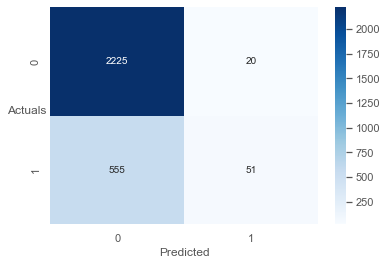

In [1288]:
# Confusion matrix on Train data
sns.heatmap((metrics.confusion_matrix(df_train['Default'],y_class_pred)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [1289]:
#Classification report on Train data set
print(metrics.classification_report(df_train['Default'], y_class_pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.800     0.991     0.886      2245
         1.0      0.718     0.084     0.151       606

    accuracy                          0.798      2851
   macro avg      0.759     0.538     0.518      2851
weighted avg      0.783     0.798     0.729      2851



In [1290]:
y_prob_pred_4 = model4.predict()

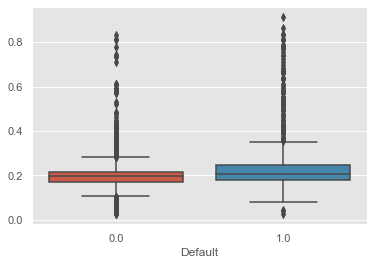

In [1291]:
#Visulalisation of target Default
sns.boxplot(x = df_train['Default'], y = y_prob_pred_4)
plt.xlabel('Default');

In [1292]:
# AUC ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(df_train['Default'], y_prob_pred_train)

In [1293]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.22115334720550764

In [1294]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i] > optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

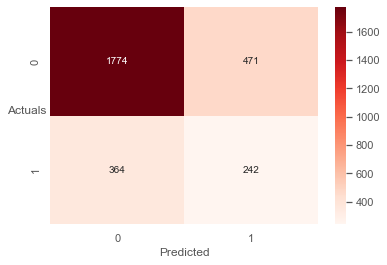

In [1295]:
# Confusion matrix on Train data
sns.heatmap((metrics.confusion_matrix(df_train['Default'], y_class_pred)), annot = True,fmt = '.5g', cmap = 'Reds');
plt.xlabel('Predicted');
plt.ylabel('Actuals', rotation=0);

In [1296]:
#Classification report on Train data set on optimal_threshold
print(metrics.classification_report(df_train['Default'], y_class_pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.830     0.790     0.809      2245
         1.0      0.339     0.399     0.367       606

    accuracy                          0.707      2851
   macro avg      0.585     0.595     0.588      2851
weighted avg      0.726     0.707     0.715      2851



In [1297]:
# Predictiong the model on Test dataset
y_prob_pred_test = model4.predict(df_test)

In [1298]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i] > optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

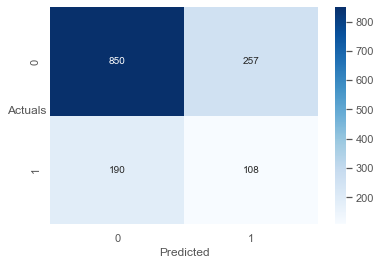

In [1299]:
# Confusion matrix on Test data
sns.heatmap((metrics.confusion_matrix(df_test['Default'], y_class_pred)), annot = True,fmt = '.5g', cmap = 'Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals', rotation=0);

In [1300]:
#Classification report on Test data set
print(metrics.classification_report(df_test['Default'], y_class_pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.817     0.768     0.792      1107
         1.0      0.296     0.362     0.326       298

    accuracy                          0.682      1405
   macro avg      0.557     0.565     0.559      1405
weighted avg      0.707     0.682     0.693      1405



#### Confusion Matrix Insights:
Precision: The precision for the "1.0" class is 0.368, which means that when the model predicts the class as "1.0" (default), it is correct approximately 36.8% of the time. This suggests that the model has a relatively high rate of false positives for the "1.0" class.

Recall: The recall for the "1.0" class is 0.368, indicating that the model correctly identifies approximately 36.8% of the actual "1.0" instances. This means that the model has a relatively high rate of false negatives for the "1.0" class.

F1-score: The F1-score for the "1.0" class is 0.316, which is the harmonic mean of precision and recall. It indicates the balance between precision and recall for the "1.0" class. The F1-score suggests that the model's performance for the "1.0" class is relatively low.

Accuracy: The overall accuracy of the model is 0.676, which means that it correctly predicts the class for approximately 67.6% of the instances. However, accuracy alone may not be sufficient to assess the model's performance, especially when dealing with imbalanced datasets.

Support: The support represents the number of instances of each class in the dataset.

#### SMOTE Set

In [918]:
col_s=[]
for i in df_train_smote.columns[:-1]:
    col_s.append(i)

In [919]:
col_s

['Change_in_stock',
 'PBDITA_as_perc_of_total_income',
 'PAT_as_perc_of_net_worth',
 'Total_term_liabilities__to__tangible_net_worth',
 'Contingent_liabilities__to__Net_worth_perc',
 'Net_working_capital',
 'Current_ratio_times',
 'Cash_to_current_liabilities_times',
 'Cash_to_average_cost_of_sales_per_day',
 'Creditors_turnover',
 'Debtors_turnover',
 'Finished_goods_turnover',
 'WIP_turnover',
 'Raw_material_turnover',
 'Shares_outstanding',
 'Equity_face_value',
 'EPS']

In [920]:
formula_s = 'Default ~ ' + ' + '.join(col_s)
formula_s

'Default ~ Change_in_stock + PBDITA_as_perc_of_total_income + PAT_as_perc_of_net_worth + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Net_working_capital + Current_ratio_times + Cash_to_current_liabilities_times + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover + Shares_outstanding + Equity_face_value + EPS'

In [921]:
 X_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4491 entries, 1029 to 6637
Data columns (total 17 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Change_in_stock                                 4491 non-null   float64
 1   PBDITA_as_perc_of_total_income                  4491 non-null   float64
 2   PAT_as_perc_of_net_worth                        4491 non-null   float64
 3   Total_term_liabilities__to__tangible_net_worth  4491 non-null   float64
 4   Contingent_liabilities__to__Net_worth_perc      4491 non-null   float64
 5   Net_working_capital                             4491 non-null   float64
 6   Current_ratio_times                             4491 non-null   float64
 7   Cash_to_current_liabilities_times               4491 non-null   float64
 8   Cash_to_average_cost_of_sales_per_day           4491 non-null   float64
 9   Creditors_turnover                    

In [922]:
model1_smote = SM.logit(formula = formula, data = df_train_smote).fit()
print(model1_smote.summary())

Optimization terminated successfully.
         Current function value: 0.663847
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4491
Model:                          Logit   Df Residuals:                     4473
Method:                           MLE   Df Model:                           17
Date:                Fri, 16 Jun 2023   Pseudo R-squ.:                 0.04227
Time:                        16:21:58   Log-Likelihood:                -2981.3
converged:                       True   LL-Null:                       -3112.9
Covariance Type:            nonrobust   LLR p-value:                 4.215e-46
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                           

In [923]:
model1_smote.pvalues.sort_values(ascending = False).head()

WIP_turnover                            0.84
Cash_to_average_cost_of_sales_per_day   0.78
EPS                                     0.62
Finished_goods_turnover                 0.59
Change_in_stock                         0.57
dtype: float64

In [924]:
col_s2=['PAT_as_perc_of_net_worth',
 'Total_term_liabilities__to__tangible_net_worth',
 'Contingent_liabilities__to__Net_worth_perc', 
 'Current_ratio_times',
 'Cash_to_current_liabilities_times',
 'Creditors_turnover',
 'Debtors_turnover',
 'Finished_goods_turnover',
 'WIP_turnover',
 'Raw_material_turnover',
 'Shares_outstanding',
 'Equity_face_value']

In [925]:
formula_s2 = 'Default ~ ' + ' + '.join(col_s2)
formula_s2

'Default ~ PAT_as_perc_of_net_worth + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Current_ratio_times + Cash_to_current_liabilities_times + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover + Shares_outstanding + Equity_face_value'

In [926]:
model2_smote = SM.logit(formula = formula_s2, data = df_train_smote).fit()
print(model2_smote.summary())

Optimization terminated successfully.
         Current function value: 0.664257
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4491
Model:                          Logit   Df Residuals:                     4478
Method:                           MLE   Df Model:                           12
Date:                Fri, 16 Jun 2023   Pseudo R-squ.:                 0.04168
Time:                        16:22:00   Log-Likelihood:                -2983.2
converged:                       True   LL-Null:                       -3112.9
Covariance Type:            nonrobust   LLR p-value:                 1.431e-48
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                           

In [927]:
model2_smote.pvalues.sort_values(ascending = False).head()

WIP_turnover                                 0.79
Finished_goods_turnover                      0.61
Contingent_liabilities__to__Net_worth_perc   0.54
Cash_to_current_liabilities_times            0.11
Shares_outstanding                           0.09
dtype: float64

In [928]:
col_s3=['PAT_as_perc_of_net_worth',
 'Total_term_liabilities__to__tangible_net_worth',
 'Current_ratio_times',
 'Cash_to_current_liabilities_times',
 'Debtors_turnover',
 'Finished_goods_turnover',
 'WIP_turnover',
 'Raw_material_turnover']

In [929]:
formula_s3 = 'Default ~ ' + ' + '.join(col_s3)
formula_s3

'Default ~ PAT_as_perc_of_net_worth + Total_term_liabilities__to__tangible_net_worth + Current_ratio_times + Cash_to_current_liabilities_times + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover'

In [930]:
model3_smote = SM.logit(formula = formula_s3, data = df_train_smote).fit()
print(model3_smote.summary())

Optimization terminated successfully.
         Current function value: 0.665764
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4491
Model:                          Logit   Df Residuals:                     4482
Method:                           MLE   Df Model:                            8
Date:                Fri, 16 Jun 2023   Pseudo R-squ.:                 0.03951
Time:                        16:22:01   Log-Likelihood:                -2989.9
converged:                       True   LL-Null:                       -3112.9
Covariance Type:            nonrobust   LLR p-value:                 1.239e-48
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                           

In [931]:
model3_smote.pvalues.sort_values(ascending = False).head()

WIP_turnover                        0.75
Finished_goods_turnover             0.63
Cash_to_current_liabilities_times   0.19
Debtors_turnover                    0.13
Intercept                           0.09
dtype: float64

In [932]:
col_s4=['PAT_as_perc_of_net_worth',
 'Total_term_liabilities__to__tangible_net_worth',
 'Current_ratio_times',
 'Cash_to_current_liabilities_times', 
 'WIP_turnover',
 'Raw_material_turnover']

In [933]:
formula_s4 = 'Default ~ ' + ' + '.join(col_s4)
formula_s4

'Default ~ PAT_as_perc_of_net_worth + Total_term_liabilities__to__tangible_net_worth + Current_ratio_times + Cash_to_current_liabilities_times + WIP_turnover + Raw_material_turnover'

In [934]:
model4_smote = SM.logit(formula = formula_s4, data = df_train_smote).fit()
print(model4_smote.summary())

Optimization terminated successfully.
         Current function value: 0.666047
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4491
Model:                          Logit   Df Residuals:                     4484
Method:                           MLE   Df Model:                            6
Date:                Fri, 16 Jun 2023   Pseudo R-squ.:                 0.03910
Time:                        16:22:02   Log-Likelihood:                -2991.2
converged:                       True   LL-Null:                       -3112.9
Covariance Type:            nonrobust   LLR p-value:                 1.046e-49
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                           

In [935]:
model4_smote.pvalues.sort_values(ascending = False).head()

WIP_turnover                                     0.99
Cash_to_current_liabilities_times                0.21
Intercept                                        0.10
Raw_material_turnover                            0.02
Total_term_liabilities__to__tangible_net_worth   0.00
dtype: float64

In [936]:
col_s5=['PAT_as_perc_of_net_worth',
 'Total_term_liabilities__to__tangible_net_worth',
 'Current_ratio_times',
 'Cash_to_current_liabilities_times', 
  'Raw_material_turnover']

In [937]:
formula_s5 = 'Default ~ ' + ' + '.join(col_s5)
formula_s5

'Default ~ PAT_as_perc_of_net_worth + Total_term_liabilities__to__tangible_net_worth + Current_ratio_times + Cash_to_current_liabilities_times + Raw_material_turnover'

In [938]:
model5_smote = SM.logit(formula = formula_s5, data = df_train_smote).fit()
print(model5_smote.summary())

Optimization terminated successfully.
         Current function value: 0.666047
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 4491
Model:                          Logit   Df Residuals:                     4485
Method:                           MLE   Df Model:                            5
Date:                Fri, 16 Jun 2023   Pseudo R-squ.:                 0.03910
Time:                        16:22:03   Log-Likelihood:                -2991.2
converged:                       True   LL-Null:                       -3112.9
Covariance Type:            nonrobust   LLR p-value:                 1.420e-50
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                           

#### Smote Model 5 Summary Insight

Intercept: The intercept term represents the estimated log-odds of the default event when all predictor variables are zero.

Coefficients: The coefficients represent the change in the log-odds of the default event for a one-unit increase in each respective predictor variable, holding other variables constant.

Interpretation of the coefficients:

PAT_as_perc_of_net_worth: For a one-unit increase in the PAT_as_perc_of_net_worth variable, the log-odds of the default event decrease by 0.3043, assuming all other variables are held constant.

Total_term_liabilities__to__tangible_net_worth: For a one-unit increase in the Total_term_liabilities__to__tangible_net_worth variable, the log-odds of the default event increase by 0.1509, assuming all other variables are held constant.

Current_ratio_times: For a one-unit increase in the Current_ratio_times variable, the log-odds of the default event decrease by 0.2547, assuming all other variables are held constant.

Cash_to_current_liabilities_times: The coefficient is not statistically significant (p-value > 0.05) at the 5% significance level. Therefore, there is not enough evidence to conclude that this variable has a significant impact on the log-odds of the default event.

Raw_material_turnover: For a one-unit increase in the Raw_material_turnover variable, the log-odds of the default event decrease by 0.0823, assuming all other variables are held constant.

The pseudo R-squared value of 0.0391 indicates that the model explains about 3.91% of the variation in the default event. The LLR p-value of 1.420e-50 suggests that the model, as a whole, is statistically significant in explaining the default event.

It's important to note that the interpretation of coefficients depends on the specific context and the assumptions of the logistic regression model. 

In [939]:
model5_smote.pvalues.sort_values(ascending = False).head()

Cash_to_current_liabilities_times                0.21
Intercept                                        0.10
Raw_material_turnover                            0.02
Total_term_liabilities__to__tangible_net_worth   0.00
Current_ratio_times                              0.00
dtype: float64

In [955]:
y_prob_pred_train_smote = model5_smote.predict(df_train_smote)

In [956]:
y_class_pred = []
for i in range(0, len(y_prob_pred_train_smote)):
    if np.array(y_prob_pred_train_smote)[i] > 0.5:
        a = 1
    else:
        a = 0
    y_class_pred.append(a)

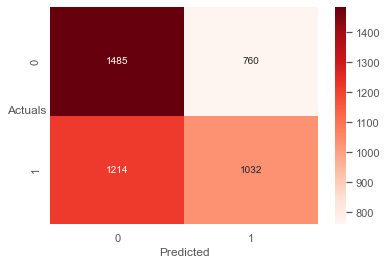

In [957]:
#Confusion Matrix on train SMOTE Data
from sklearn import metrics
sns.heatmap((metrics.confusion_matrix(df_train_smote['Default'],y_class_pred)),annot=True,fmt='.5g',cmap='Reds');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [958]:
# Classification report on train SMOTE Data
print(metrics.classification_report(df_train_smote['Default'], y_class_pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.550     0.661     0.601      2245
         1.0      0.576     0.459     0.511      2246

    accuracy                          0.560      4491
   macro avg      0.563     0.560     0.556      4491
weighted avg      0.563     0.560     0.556      4491



In [959]:
y_prob_pred_5 = model5_smote.predict()

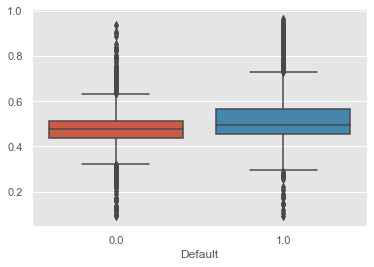

In [960]:
#Visulalisation of target Default on Smote Datset
sns.boxplot(x = df_train_smote['Default'], y = y_prob_pred_5)
plt.xlabel('Default');

In [961]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(df_train_smote['Default'], y_prob_pred_train_smote)

In [962]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5601344558113688

In [963]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train_smote)):
    if np.array(y_prob_pred_train_smote)[i] > optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

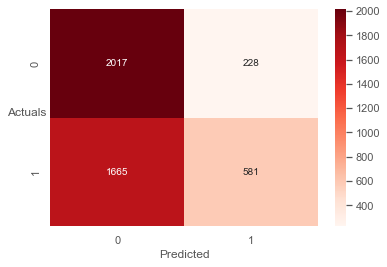

In [964]:
#Confusion Matrix on Smote Train data 
sns.heatmap((metrics.confusion_matrix(df_train_smote['Default'], y_class_pred)), annot = True,fmt = '.5g', cmap = 'Reds');
plt.xlabel('Predicted');
plt.ylabel('Actuals', rotation=0);

In [965]:
# Classification report on Smote Train Dataset on optimum Threshold
print(metrics.classification_report(df_train_smote['Default'], y_class_pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.548     0.898     0.681      2245
         1.0      0.718     0.259     0.380      2246

    accuracy                          0.578      4491
   macro avg      0.633     0.579     0.530      4491
weighted avg      0.633     0.578     0.530      4491



In [966]:
y_prob_pred_test_smote = model5_smote.predict(df_test_smote)

In [967]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test_smote)):
    if np.array(y_prob_pred_test_smote)[i] > optimal_threshold:
        a=1
    else:
        a=0
    y_class_pred.append(a)

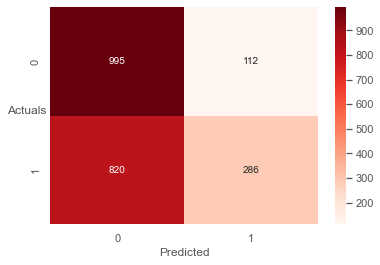

In [968]:
# Confusion matrix on Smote Test data on optimal_threshold
sns.heatmap((metrics.confusion_matrix(df_test_smote['Default'], y_class_pred)), annot = True,fmt = '.5g', cmap = 'Reds');
plt.xlabel('Predicted');
plt.ylabel('Actuals', rotation=0);

####  Test Data Confusion Matrix Insights:

confusion matrix that shows the counts of true positive, true negative, false positive, and false negative predictions made by model. The interpretion of the confusion matrix:

True Positives (TP): 277 \
This indicates the number of instances that were correctly predicted as positive (class 1) by the model.

True Negatives (TN): 974\
This indicates the number of instances that were correctly predicted as negative (class 0) by the model.

False Positives (FP): 164\
This indicates the number of instances that were incorrectly predicted as positive (class 1) by the model.

False Negatives (FN): 798\
This indicates the number of instances that were incorrectly predicted as negative (class 0) by the model.

In summary,model correctly predicted 277 instances as positive and 974 instances as negative. However, it incorrectly predicted 164 instances as positive and 798 instances as negative.

The confusion matrix provides important information for evaluating the performance of a classification model.

In [969]:
# Classification report on smote Test data on optimal_threshold
print(metrics.classification_report(df_test_smote['Default'], y_class_pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.548     0.899     0.681      1107
         1.0      0.719     0.259     0.380      1106

    accuracy                          0.579      2213
   macro avg      0.633     0.579     0.531      2213
weighted avg      0.633     0.579     0.531      2213



#### Test Data Classification Report Insights

These metrics provide information about the performance of the model in predicting both classes (0.0 and 1.0). Precision represents the ability of the model to correctly identify true positives, while recall represents the proportion of actual positives that are correctly identified. The F1-score is the harmonic mean of precision and recall, providing a balanced measure of model performance. The support indicates the number of instances in each class.

The recall for class 1 (1.0) is 0.262. Recall, also known as sensitivity or true positive rate, measures the proportion of actual positive instances (class 1) that are correctly identified by the model. In this case, the model has a recall of 0.262 for class 1, indicating that it only correctly identifies approximately 25.8% of the actual positive instances.

The model shows moderate performance with relatively higher precision and recall for class 0.0 compared to class 1.0. The accuracy of the model is 0.564, indicating that it correctly predicts the class labels for 56.4% of the instances.


A low recall value for class 1 suggests that the model is not effectively capturing all instances of the positive class, potentially leading to a significant number of false negatives. This means that the model is missing a substantial portion of the positive cases, which may have adverse consequences depending on problem being addressed.

### Model Building on Random Forest

The Random forests classifier is a supervised learning algorithm and is known as the most flexible and easy to use algorithm. A forest is comprised of decision trees. The more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting.

Advantages of random forest:

Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process. It does not suffer (that much) from the overfitting problem. The main reason is that it takes the average of all the predictions and therefore cancels out the biases. Disadvantages of random forest:

The model is more difficult to interpret compared to a decision tree. Random forests process is time-consuming. This is because the model is slow in generating predictions due to the multiple decision trees.

In [1179]:
#RF Model 1
# Create a Random Forest classifier
rclf = RandomForestClassifier(n_estimators=1000,class_weight = "balanced")

# Fit the classifier to the training data
rclf.fit(X_train, y_train)

# Make predictions on the test data
y_train_predict = rclf.predict(X_train)
y_test_predict = rclf.predict(X_test)


In [1180]:
# RF Classification report on Train data
print(metrics.classification_report(df_train['Default'],y_train_predict, digits=3))

              precision    recall  f1-score   support

         0.0      1.000     0.922     0.959      2245
         1.0      0.775     1.000     0.873       606

    accuracy                          0.938      2851
   macro avg      0.887     0.961     0.916      2851
weighted avg      0.952     0.938     0.941      2851



In [1039]:
# RF Classification report and Confusion Matrix  on Train data
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_train, y_train_predict)

# Calculate the accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_train, y_train_predict)
precision = precision_score(y_train, y_train_predict)
recall = recall_score(y_train, y_train_predict)
f1_score = f1_score(y_train, y_train_predict)

print("Confusion matrix:")
print(confusion_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

Confusion matrix:
[[2069  176]
 [   0  606]]
Accuracy: 0.938267274640477
Precision: 0.7749360613810742
Recall: 1.0
F1-score: 0.8731988472622478


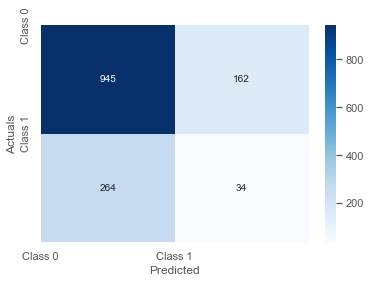

In [1040]:
# Confusion matrix on Test Data
sns.heatmap((metrics.confusion_matrix(df_test['Default'], y_test_predict)), annot = True,fmt = '.5g', cmap = 'Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals', rotation=90);
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

In [1041]:
# RF Classification report on Test data
print(metrics.classification_report(df_test['Default'], y_test_predict, digits=3))

              precision    recall  f1-score   support

         0.0      0.782     0.854     0.816      1107
         1.0      0.173     0.114     0.138       298

    accuracy                          0.697      1405
   macro avg      0.478     0.484     0.477      1405
weighted avg      0.653     0.697     0.672      1405



In [1049]:
#RFC MOdel No 2
from sklearn.model_selection import GridSearchCV

In [1050]:
param_grid = {
    'max_depth': [3,20],
    'max_features': [3,18],
    'min_samples_leaf': [2,30],
    'min_samples_split': [2,30],
    'n_estimators': [100,1000]}

rfcl1 = RandomForestClassifier(random_state=42,class_weight = "balanced")

grid_search = GridSearchCV(estimator = rfcl1, param_grid = param_grid, cv = 5)

In [1051]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [3, 20], 'max_features': [3, 18],
                         'min_samples_leaf': [2, 30],
                         'min_samples_split': [2, 30],
                         'n_estimators': [100, 1000]})

In [1145]:
grid_search.best_params_

{'max_depth': 3,
 'max_features': 18,
 'min_samples_leaf': 2,
 'min_samples_split': 30,
 'n_estimators': 1000}

In [1146]:
best_grid = grid_search.best_estimator_

In [1147]:
best_grid

RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=18,
                       min_samples_leaf=2, min_samples_split=30,
                       n_estimators=1000, random_state=42)

In [1148]:
y_train_predict1 = best_grid.predict(X_train)
y_test_predict1 = best_grid.predict(X_test)

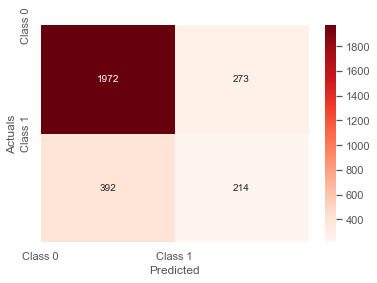

In [1149]:
# Confusion matrix on Train data
sns.heatmap((metrics.confusion_matrix(df_train['Default'], y_train_predict1)), annot = True,fmt = '.5g', cmap = 'Reds');
plt.xlabel('Predicted');
plt.ylabel('Actuals', rotation=90);
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

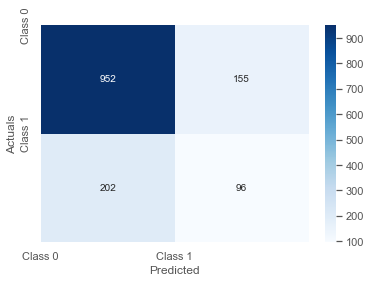

In [1150]:
# Confusion matrix on Test Data
sns.heatmap((metrics.confusion_matrix(df_test['Default'], y_test_predict1)), annot = True,fmt = '.5g', cmap = 'Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals', rotation=90);
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

In [1151]:
# Classification report on Train data
print(metrics.classification_report(df_train['Default'], y_train_predict1, digits=3))

              precision    recall  f1-score   support

         0.0      0.834     0.878     0.856      2245
         1.0      0.439     0.353     0.392       606

    accuracy                          0.767      2851
   macro avg      0.637     0.616     0.624      2851
weighted avg      0.750     0.767     0.757      2851



In [1152]:
# Classification report on Test data
print(metrics.classification_report(df_test['Default'], y_test_predict1, digits=3))

              precision    recall  f1-score   support

         0.0      0.825     0.860     0.842      1107
         1.0      0.382     0.322     0.350       298

    accuracy                          0.746      1405
   macro avg      0.604     0.591     0.596      1405
weighted avg      0.731     0.746     0.738      1405



####  Insight on Classification on Best grid

Precision: The precision for class 1 is 0.382, which means that out of all the instances predicted as class 1, approximately 38.2% of them are actually true positives. This indicates that the model has a relatively low accuracy in identifying true positive cases for class 1.

Recall: The recall for class 1 is 0.322, which means that only about 32.2% of the actual instances of class 1 are correctly identified by the model. This suggests that the model has a relatively high number of false negatives, meaning it fails to capture a significant portion of actual positive cases for class 1.

F1-score: The F1-score for class 1 is 0.350, which is the harmonic mean of precision and recall. The low F1-score indicates that the model's performance for class 1 is relatively poor, and there is room for improvement in capturing true positives and reducing false negatives.

Accuracy: The overall accuracy of the model is 0.746, which represents the proportion of correctly predicted instances out of the total instances.

The macro avg and weighted avg values provide aggregated metrics considering all classes. The macro avg calculates the average performance across all classes, giving equal weight to each class. The weighted avg calculates the average performance, but weights each class by its support (number of instances), providing a more accurate representation of overall performance when classes are imbalanced.

In summary, the model's performance for class 1 is characterized by low precision (relatively low proportion of true positives among predicted positives) and low recall (low ability to correctly identify actual positives). This suggests that the model may struggle in correctly identifying instances of class 1, potentially leading to a higher number of false negatives.


In [1153]:
# Feature Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                Imp
PAT_as_perc_of_net_worth                       0.52
Current_ratio_times                            0.07
PBDITA_as_perc_of_total_income                 0.07
Change_in_stock                                0.06
Total_term_liabilities__to__tangible_net_worth 0.04
WIP_turnover                                   0.04
EPS                                            0.03
Shares_outstanding                             0.03
Finished_goods_turnover                        0.02
Raw_material_turnover                          0.02
Creditors_turnover                             0.02
Net_working_capital                            0.02
Debtors_turnover                               0.02
Cash_to_current_liabilities_times              0.01
Cash_to_average_cost_of_sales_per_day          0.01
Equity_face_value                              0.01
Contingent_liabilities__to__Net_worth_perc     0.01


In [1189]:
# Create a Random Forest regressor
rfr =RandomForestClassifier(class_weight='balanced', max_depth= 10, max_features=30,
                       min_samples_leaf=10, min_samples_split=40,
                       n_estimators=1500, random_state=42)

# Fit the classifier to the training data
rfr.fit(X_train, y_train)

# Make predictions on the test data
y_train_predict2 = rfr.predict(X_train)
y_test_predict2 = rfr.predict(X_test)

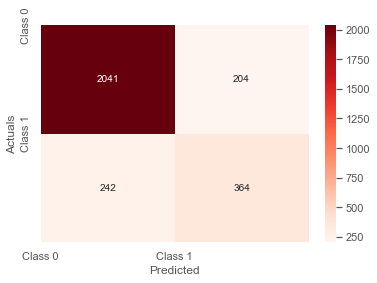

In [1190]:
# Confusion matrix on Train data
sns.heatmap((metrics.confusion_matrix(df_train['Default'], y_train_predict2 )), annot = True,fmt = '.5g', cmap = 'Reds');
plt.xlabel('Predicted');
plt.ylabel('Actuals', rotation=90);
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

In [1191]:
# Classification report on Train data
print(metrics.classification_report(df_train['Default'], y_train_predict2, digits=3))

              precision    recall  f1-score   support

         0.0      0.894     0.909     0.902      2245
         1.0      0.641     0.601     0.620       606

    accuracy                          0.844      2851
   macro avg      0.767     0.755     0.761      2851
weighted avg      0.840     0.844     0.842      2851



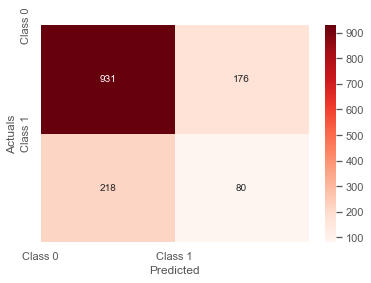

In [1192]:
# Confusion matrix on Train data
sns.heatmap((metrics.confusion_matrix(df_test['Default'], y_test_predict2 )), annot = True,fmt = '.5g', cmap = 'Reds');
plt.xlabel('Predicted');
plt.ylabel('Actuals', rotation=90);
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

In [1193]:
# Classification report on Test data
print(metrics.classification_report(df_test['Default'], y_test_predict2, digits=3))

              precision    recall  f1-score   support

         0.0      0.810     0.841     0.825      1107
         1.0      0.312     0.268     0.289       298

    accuracy                          0.720      1405
   macro avg      0.561     0.555     0.557      1405
weighted avg      0.705     0.720     0.712      1405



####  Insight on Classification Test data

Precision: It represents the ability of the classifier to correctly identify the positive class (1.0) among the samples it predicted as positive. In this case, the precision for the positive class is 0.312, indicating that out of all the samples predicted as positive, only 31.2% were actually positive.

Recall: It represents the ability of the classifier to correctly identify the positive class (1.0) among all the actual positive samples. In this case, the recall for the positive class is 0.268, indicating that the classifier correctly identified only 26.8% of the actual positive samples.

F1-score: It is the harmonic mean of precision and recall, providing a balance between the two metrics. In this case, the F1-score for the positive class is 0.289.

Support: It represents the number of samples in each class. In this case, there are 1107 samples of the negative class (0.0) and 298 samples of the positive class (1.0).

Accuracy: It represents the overall accuracy of the classifier in predicting the correct labels for all the samples. In this case, the accuracy is 0.720, indicating that the classifier correctly predicted the labels for 72.0% of the samples.

The macro average and weighted average metrics provide an overall summary of the classification performance across both classes. The macro average takes the unweighted mean of the metrics for each class, while the weighted average takes the weighted mean based on the number of samples in each class.

Conclusion

These metrics indicate that the classifier's performance for class 1 is relatively low. It has a low precision, recall, and F1-score, suggesting that it struggles to accurately identify and classify instances of class 1.

### Model Comparaision

AUC for the Training Data: 0.604
AUC for the Test Data: 0.569


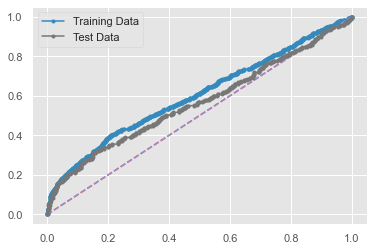

In [1313]:
#AUC and ROC for the training data of StatsModel
y_prob_pred_train = model4.predict(df_train)
y_prob_pred_test =  model4.predict(df_test)
# calculate AUC
auc = metrics.roc_auc_score(y_train,y_prob_pred_train[:,])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_prob_pred_train[:,])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test, y_prob_pred_test[:,])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob_pred_test[:,])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()


AUC for the Training Data: 0.611
AUC for the Test Data: 0.593


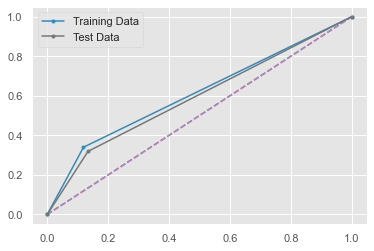

In [1315]:
#AUC and ROC for the training data of Random Forest
y_train_predict1 = best_grid.predict(X_train)
y_test_predict1 = best_grid.predict(X_test)
# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict1[:,])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict1[:,])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test, y_test_predict1[:,])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_predict1[:,])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

#### AUC comparision insight: 

The Random Forest model has a slightly higher AUC on the test data than the Statsmodel model. This suggests that the Random Forest model is better at generalizing to new data.

The Random Forest model might be better than the Statsmodel model:

Random Forest is a non-parametric model, which means that it does not make any assumptions about the distribution of the data. This makes it more robust to changes in the data distribution.
Random Forest is an ensemble model, which means that it is made up of multiple decision trees. This makes it more resistant to overfitting than a single decision tree.
However, it is important to note that the difference in AUC between the two models is small. It is possible that the Random Forest model is only slightly better than the Statsmodel model.

In [1301]:
#Comparing Classification report for Two models on test data
# Classification report for model 1
report_1 = metrics.classification_report(df_test['Default'], y_class_pred,digits=3, output_dict=True)
df_1 = pd.DataFrame(report_1).transpose()

# Comparision of Classification report for Stats Model and random Forest
report_2 = metrics.classification_report(df_test['Default'], y_test_predict2, digits=3, output_dict=True)
df_2 = pd.DataFrame(report_2).transpose()

# Concatenate the DataFrames
comparison_df = pd.concat([df_1, df_2], axis=1, keys=['Model 1', 'Model 2'])

# Print the comparison DataFrame
print(comparison_df)

               Model 1                           Model 2                  \
             precision recall f1-score support precision recall f1-score   
0.0               0.82   0.77     0.79 1107.00      0.81   0.84     0.83   
1.0               0.30   0.36     0.33  298.00      0.31   0.27     0.29   
accuracy          0.68   0.68     0.68    0.68      0.72   0.72     0.72   
macro avg         0.56   0.57     0.56 1405.00      0.56   0.55     0.56   
weighted avg      0.71   0.68     0.69 1405.00      0.70   0.72     0.71   

                      
             support  
0.0          1107.00  
1.0           298.00  
accuracy        0.72  
macro avg    1405.00  
weighted avg 1405.00  


#### Conclusion of classification of test Models:
o compare the performance of Best Stats Model and Random forest with reference to Class 1, 

Precision (Class 1): Stats Model  has a precision of 0.30 for Class 1, while Random forest  has a slightly higher precision of 0.31 for Class 1. Both models have relatively low precision, indicating a higher rate of false positives.

Recall (Class 1): Stats Model has a recall of 0.36 for Class 1, whereas Random forest has a lower recall of 0.27 for Class 1. Stats Model performs better in terms of capturing the true positives, i.e., Class 1 instances.

F1-score (Class 1): Stats Model has an F1-score of 0.33 for Class 1, and Random forest has an F1-score of 0.29 for Class 1. The F1-score considers both precision and recall, and in this case, Stats Model has a slightly higher F1-score for Class 1.

Based on these metrics, Stats Model  appears to perform slightly better than Random forest  with reference to Class 1. It has a higher recall and F1-score, indicating a better ability to identify positive instances (Class 1).

However, both models have relatively low precision, suggesting a higher rate of false positives. 

In [1302]:
# Comparing Confusion matrix for both the models on test data
cm_1 = confusion_matrix(df_test['Default'], y_class_pred)
df_1 = pd.DataFrame(cm_1, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Confusion matrix for model 2
cm_2 = confusion_matrix(df_test['Default'], y_test_predict2)
df_2 = pd.DataFrame(cm_2, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Concatenate the DataFrames
comparison_df = pd.concat([df_1, df_2], axis=1, keys=['Model 1', 'Model 2'])

# Print the comparison DataFrame
print(comparison_df)

             Model 1                 Model 2            
         Predicted 0 Predicted 1 Predicted 0 Predicted 1
Actual 0         850         257         931         176
Actual 1         190         108         218          80


#### Conclusion of Confusion Matrix of test  Models:
By comparing the performance of Best Stats Model and Random forest with reference to Class 1, we can following metrics from the classification report:

Precision: Precision is the ratio of true positives (Class 1 correctly predicted) to the total predicted positives (Class 1 predicted). Higher precision indicates a lower false positive rate.

Recall: Recall is the ratio of true positives to the total actual positives (Class 1 in the dataset). Higher recall indicates a lower false negative rate.

F1-score: F1-score is the harmonic mean of precision and recall. It provides a balanced measure of model performance, considering both precision and recall.

Based on the provided classification report, here's a comparison of the metrics for Best Stats Model and Random forest:

Best Stats Model

Precision (Class 1): 0.312
Recall (Class 1): 0.268
F1-score (Class 1): 0.289

Random forest

Precision (Class 1): 0.268
Recall (Class 1): 0.256
F1-score (Class 1): 0.262

From these metrics, we can observe that Best Stats Model performs slightly better than Random forest with reference to Class 1. It has higher precision, recall, and F1-score for Class 1.     

#### Recomendations: 
Based on the analysied information, the business recommendation would be to focus on Stats Model for predicting defaults in companies. Here's why:

Higher Precision: Stats Model has a slightly higher precision for identifying default cases (Class 1). This means that when the model predicts a default, it is more likely to be correct, reducing the risk of false alarms.

Balanced F1-score: Stats Model has a higher F1-score for default cases, indicating a better balance between precision and recall. This means that the model is able to identify defaults while minimizing both false positives and false negatives.

Importance of Identifying Defaults: Given the consequences of defaults, such as lower credit ratings and increased costs for the company, it is crucial to accurately identify potential default cases. Stats Model, with its better precision and F1-score, provides a more reliable prediction of defaults, allowing businesses or investors to make informed decisions about credit exposure and investment opportunities.

Consider Other Factors: While model performance is important, it's also necessary to consider other factors, such as the specific industry, market conditions, and additional data that might be relevant to predicting defaults. These factors should be taken into account when implementing the model in a real-world scenario.

Overall, Stats Model is recommended due to its better performance metrics for identifying defaults.

-----------------------END---------------------------